In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(df.columns)
print(df.shape)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
(10000, 14)


In [4]:
X = df.iloc[:,3:13].values # we have two categorical variable here (country and gender)
y = df.iloc[:,13].values
print(X[:,1])
print(X[:,2])
print(X.shape)

['France' 'Spain' 'France' ... 'France' 'Germany' 'France']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']
(10000, 10)


In [5]:
X[0,:]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [6]:
X[0,:]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [7]:
# Encoding categorical data...we need to encode the above tow categorical features in our matrix of features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
print(X[:,1])
print(X[:,2])
print("------------------------------------------")
# also we need to take care of the fact that our categorical variables are not ordinal
# in other words, there is no relational order between the categories of our categorical variables
# hence we need to create dummy variables using one hot encoder
colTrans = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1])],remainder='passthrough')
X = np.array(colTrans.fit_transform(X), dtype = np.str)
print(X.shape)
X = X[:, 1:]# removing the dummy variable
print(X.shape)

[0 2 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
------------------------------------------
(10000, 12)
(10000, 11)


In [8]:
print(X[:,1])
print(X[:,2])

['0.0' '1.0' '0.0' ... '0.0' '0.0' '0.0']
['619' '608' '502' ... '709' '772' '792']


In [9]:
X[0,:]

array(['0.0', '0.0', '619', '0', '42', '2', '0.0', '1', '1', '1',
       '101348.88'], dtype='<U9')

# Digression: one hot encoder

In [10]:
# # One Hot Encoding of datasets: applied to categorical data
# # https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

# # https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

# # ['cold', 'warm', 'hot']
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
# values = np.array(data)
# print(values)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)

# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

In [11]:
X.shape

(10000, 11)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train

array([['0.0', '1.0', '667', ..., '1', '0', '163830.64'],
       ['1.0', '0.0', '427', ..., '1', '1', '57098.0'],
       ['0.0', '0.0', '535', ..., '1', '0', '185630.76'],
       ...,
       ['0.0', '0.0', '738', ..., '1', '0', '181429.87'],
       ['0.0', '1.0', '590', ..., '1', '1', '148750.16'],
       ['1.0', '0.0', '623', ..., '1', '0', '118855.26']], dtype='<U9')

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [18]:
# Importing the Keras libraries and packages required to build the artificial neural network (ANN)
import keras
# sequential module initializes the ANN
# dense module builds (add) the layers of ANN
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
classifier = Sequential()

In [20]:
type(classifier)

keras.engine.sequential.Sequential

In [22]:
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [23]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [24]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [26]:
classifier.fit(X_train,y_train, batch_size=10,epochs=20)

Epoch 1/20
8000/8000 [==============================] - 1s 144us/step - loss: 0.4110 - accuracy: 0.8326
Epoch 2/20
8000/8000 [==============================] - 1s 139us/step - loss: 0.4100 - accuracy: 0.8326
Epoch 3/20
8000/8000 [==============================] - 1s 143us/step - loss: 0.4089 - accuracy: 0.8334
Epoch 4/20
8000/8000 [==============================] - 1s 138us/step - loss: 0.4084 - accuracy: 0.8331
Epoch 5/20
8000/8000 [==============================] - 1s 142us/step - loss: 0.4075 - accuracy: 0.8331
Epoch 6/20
8000/8000 [==============================] - 1s 140us/step - loss: 0.4070 - accuracy: 0.8344
Epoch 7/20
8000/8000 [==============================] - 1s 142us/step - loss: 0.4064 - accuracy: 0.8340
Epoch 8/20
8000/8000 [==============================] - 1s 142us/step - loss: 0.4059 - accuracy: 0.8338
Epoch 9/20
8000/8000 [==============================] - 1s 140us/step - loss: 0.4057 - accuracy: 0.8354
Epoch 10/20
8000/8000 [==============================] - 1s 144u

In [27]:
y_pred = classifier.predict(X_test) 

In [28]:
y_pred

array([[0.23728348],
       [0.3442083 ],
       [0.1819745 ],
       ...,
       [0.18503092],
       [0.15807913],
       [0.12587869]], dtype=float32)

In [29]:
y_pred = y_pred>0.5  # boolean result

In [30]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [32]:
y_pred = np.multiply(y_pred,1) # also try map

In [33]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

In [35]:
cm
# correct predictions (1502 and 213)
# incorrect predictions (192, 213)

array([[1547,   48],
       [ 266,  139]])

In [36]:
# Accuracy = # of correct predictions / total predictions
([cm[0,0]+cm[1,1]])[0]/len(y_test)

0.843

In [37]:
# we can get higher accuracy by parameter tuning

In [38]:
df.columns[3:13]

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [39]:
new_prediction = np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]],dtype=float)
# sc.transform(new_prediction) # incorrect answer!

classifier.predict(sc.transform(new_prediction))>0.5

array([[False]])

In [40]:
X[0,:]

array(['0.0', '0.0', '619', '0', '42', '2', '0.0', '1', '1', '1',
       '101348.88'], dtype='<U9')

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# function building the ANN classifier
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
    return classifier

# global classifier: used to build (train) ANN on 10 different training folds
# each time the model performance is dertermined
classifier = KerasClassifier(build_fn=build_classifier, batch_size = 10, epochs=20)
# cv = 10 folds, n_jobs: # of cpus used to do the computation (parallel computation) (-1: all CPUs)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [51]:
accuracies

array([0.83625001, 0.84125   , 0.82875001, 0.83499998, 0.85250002,
       0.85124999, 0.82875001, 0.82499999, 0.84500003, 0.83625001])

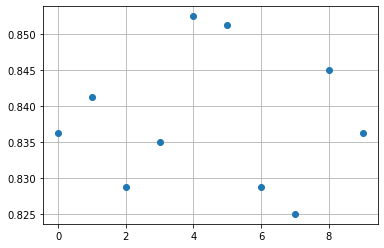

In [57]:
plt.plot(accuracies,'o')
plt.grid()

In [52]:
mean = accuracies.mean()
variance = accuracies.std()

In [53]:
print(mean, variance)

0.8380000054836273 0.008947769040969538


In [63]:
from keras.layers import Dropout
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
# rate = 0.1: 1 out of 10 neurons are dissabled
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

AttributeError: 'KerasClassifier' object has no attribute 'add'

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV 

# function building the ANN classifier
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) 
    return classifier

classifier = KerasClassifier(build_fn=build_classifier) # the ANN

# grid search: writing inside a dictionary for (hyper_parameters: values) (6:10)
parameters = {'batch_size': [25, 32], 'epochs': [100, 500], 'optimizer':['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X=X_train,y=y_train)# here we use the same name for the object, 'grid_search'

Epoch 1/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.5479 - accuracy: 0.7962
Epoch 2/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.4355 - accuracy: 0.7971
Epoch 3/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4296 - accuracy: 0.7971
Epoch 4/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4256 - accuracy: 0.7971
Epoch 5/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4222 - accuracy: 0.7971
Epoch 6/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4195 - accuracy: 0.8004
Epoch 7/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4176 - accuracy: 0.8196
Epoch 8/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4166 - accuracy: 0.8225
Epoch 9/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4155 - accuracy: 0.8257
Epoch 10/100
7200/7200 [==============================] - 0s 57u

7200/7200 [==============================] - 0s 60us/step - loss: 0.4008 - accuracy: 0.8351
Epoch 80/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.4008 - accuracy: 0.8347
Epoch 81/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4008 - accuracy: 0.8347
Epoch 82/100
7200/7200 [==============================] - 0s 65us/step - loss: 0.4008 - accuracy: 0.8343
Epoch 83/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4008 - accuracy: 0.8343
Epoch 84/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4007 - accuracy: 0.8332
Epoch 85/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4008 - accuracy: 0.8349
Epoch 86/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4008 - accuracy: 0.8350
Epoch 87/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.4006 - accuracy: 0.8349
Epoch 88/100
7200/7200 [==============================] - 0s 61us/st

7200/7200 [==============================] - 0s 57us/step - loss: 0.4044 - accuracy: 0.8351
Epoch 36/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.4039 - accuracy: 0.8344
Epoch 37/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4042 - accuracy: 0.8344
Epoch 38/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.4039 - accuracy: 0.8335
Epoch 39/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4035 - accuracy: 0.8347
Epoch 40/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.4034 - accuracy: 0.8344
Epoch 41/100
7200/7200 [==============================] - 0s 66us/step - loss: 0.4032 - accuracy: 0.8350
Epoch 42/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.4032 - accuracy: 0.8344
Epoch 43/100
7200/7200 [==============================] - 1s 70us/step - loss: 0.4033 - accuracy: 0.8344
Epoch 44/100
7200/7200 [==============================] - 1s 71us/st

7200/7200 [==============================] - 0s 58us/step - loss: 0.3975 - accuracy: 0.8368
Epoch 92/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.3975 - accuracy: 0.8360
Epoch 93/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.3975 - accuracy: 0.8357
Epoch 94/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.3975 - accuracy: 0.8372
Epoch 95/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.3971 - accuracy: 0.8374
Epoch 96/100
7200/7200 [==============================] - 0s 69us/step - loss: 0.3971 - accuracy: 0.8371
Epoch 97/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.3971 - accuracy: 0.8363
Epoch 98/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.3971 - accuracy: 0.8365
Epoch 99/100
7200/7200 [==============================] - 0s 65us/step - loss: 0.3972 - accuracy: 0.8368
Epoch 100/100
7200/7200 [==============================] - 0s 60us/s

7200/7200 [==============================] - 0s 59us/step - loss: 0.3483 - accuracy: 0.8601
Epoch 48/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.3480 - accuracy: 0.8564
Epoch 49/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.3476 - accuracy: 0.8569
Epoch 50/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.3466 - accuracy: 0.8599
Epoch 51/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.3478 - accuracy: 0.8597
Epoch 52/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.3451 - accuracy: 0.8618
Epoch 53/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.3460 - accuracy: 0.8578
Epoch 54/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3464 - accuracy: 0.8604
Epoch 55/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3457 - accuracy: 0.8603
Epoch 56/100
7200/7200 [==============================] - 0s 57us/st

7200/7200 [==============================] - 0s 64us/step - loss: 0.4306 - accuracy: 0.7962
Epoch 4/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4279 - accuracy: 0.7962
Epoch 5/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4254 - accuracy: 0.7962
Epoch 6/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4231 - accuracy: 0.7962
Epoch 7/100
7200/7200 [==============================] - 0s 65us/step - loss: 0.4205 - accuracy: 0.7962
Epoch 8/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4186 - accuracy: 0.7974
Epoch 9/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.4166 - accuracy: 0.8186
Epoch 10/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.4159 - accuracy: 0.8215
Epoch 11/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.4145 - accuracy: 0.8246
Epoch 12/100
7200/7200 [==============================] - 0s 65us/step - l

7200/7200 [==============================] - 0s 52us/step - loss: 0.3924 - accuracy: 0.8375
Epoch 60/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.3921 - accuracy: 0.8371
Epoch 61/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.3926 - accuracy: 0.8372
Epoch 62/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.3920 - accuracy: 0.8375
Epoch 63/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.3920 - accuracy: 0.8385
Epoch 64/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.3917 - accuracy: 0.8369
Epoch 65/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.3918 - accuracy: 0.8368
Epoch 66/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.3920 - accuracy: 0.8365
Epoch 67/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3919 - accuracy: 0.8378
Epoch 68/100
7200/7200 [==============================] - 0s 55us/st

7200/7200 [==============================] - 0s 60us/step - loss: 0.3733 - accuracy: 0.8449
Epoch 16/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3711 - accuracy: 0.8467
Epoch 17/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.3695 - accuracy: 0.8499
Epoch 18/100
7200/7200 [==============================] - 1s 84us/step - loss: 0.3672 - accuracy: 0.8500
Epoch 19/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3660 - accuracy: 0.8510
Epoch 20/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.3646 - accuracy: 0.8519
Epoch 21/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.3634 - accuracy: 0.8540
Epoch 22/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.3620 - accuracy: 0.8521
Epoch 23/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3611 - accuracy: 0.8543
Epoch 24/100
7200/7200 [==============================] - 1s 71us/st

7200/7200 [==============================] - 1s 94us/step - loss: 0.3455 - accuracy: 0.8604
Epoch 94/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3448 - accuracy: 0.8621
Epoch 95/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.3451 - accuracy: 0.8621
Epoch 96/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.3454 - accuracy: 0.8576
Epoch 97/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.3452 - accuracy: 0.8618
Epoch 98/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.3448 - accuracy: 0.8606
Epoch 99/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.3448 - accuracy: 0.8593
Epoch 100/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.3442 - accuracy: 0.8612
Epoch 1/100
7200/7200 [==============================] - 1s 109us/step - loss: 0.5651 - accuracy: 0.7958
Epoch 2/100
7200/7200 [==============================] - 1s 81us/st

7200/7200 [==============================] - 1s 87us/step - loss: 0.4020 - accuracy: 0.8363
Epoch 50/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4020 - accuracy: 0.8349
Epoch 51/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4016 - accuracy: 0.8364
Epoch 52/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4019 - accuracy: 0.8338
Epoch 53/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4018 - accuracy: 0.8349
Epoch 54/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4018 - accuracy: 0.8360
Epoch 55/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4014 - accuracy: 0.8364
Epoch 56/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.4017 - accuracy: 0.8357
Epoch 57/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4014 - accuracy: 0.8361
Epoch 58/100
7200/7200 [==============================] - 1s 81us/st

7200/7200 [==============================] - 0s 54us/step - loss: 0.4178 - accuracy: 0.8138
Epoch 6/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4110 - accuracy: 0.8240
Epoch 7/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4046 - accuracy: 0.8257
Epoch 8/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3990 - accuracy: 0.8271
Epoch 9/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3938 - accuracy: 0.8283
Epoch 10/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.3900 - accuracy: 0.8299
Epoch 11/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3869 - accuracy: 0.8304
Epoch 12/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.3832 - accuracy: 0.8304
Epoch 13/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.3806 - accuracy: 0.8356
Epoch 14/100
7200/7200 [==============================] - 0s 53us/step -

7200/7200 [==============================] - 0s 53us/step - loss: 0.4010 - accuracy: 0.8351
Epoch 62/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4008 - accuracy: 0.8344
Epoch 63/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4009 - accuracy: 0.8351
Epoch 64/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4005 - accuracy: 0.8342
Epoch 65/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4007 - accuracy: 0.8347
Epoch 66/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4001 - accuracy: 0.8346
Epoch 67/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.4004 - accuracy: 0.8353
Epoch 68/100
7200/7200 [==============================] - 0s 50us/step - loss: 0.4006 - accuracy: 0.8346
Epoch 69/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3997 - accuracy: 0.8346
Epoch 70/100
7200/7200 [==============================] - 0s 51us/st

7200/7200 [==============================] - 0s 52us/step - loss: 0.4103 - accuracy: 0.8303
Epoch 18/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4095 - accuracy: 0.8326
Epoch 19/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4088 - accuracy: 0.8324
Epoch 20/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4079 - accuracy: 0.8338
Epoch 21/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4072 - accuracy: 0.8333
Epoch 22/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4063 - accuracy: 0.8325
Epoch 23/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4057 - accuracy: 0.8340
Epoch 24/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4049 - accuracy: 0.8346
Epoch 25/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4038 - accuracy: 0.8354
Epoch 26/100
7200/7200 [==============================] - 0s 53us/st

7200/7200 [==============================] - 0s 52us/step - loss: 0.3911 - accuracy: 0.8381
Epoch 74/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3908 - accuracy: 0.8393
Epoch 75/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3912 - accuracy: 0.8400
Epoch 76/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3914 - accuracy: 0.8393
Epoch 77/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3909 - accuracy: 0.8371
Epoch 78/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3908 - accuracy: 0.8378
Epoch 79/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3911 - accuracy: 0.8396
Epoch 80/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.3906 - accuracy: 0.8393
Epoch 81/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3912 - accuracy: 0.8394
Epoch 82/100
7200/7200 [==============================] - 0s 51us/st

7200/7200 [==============================] - 0s 51us/step - loss: 0.3949 - accuracy: 0.8350
Epoch 30/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3946 - accuracy: 0.8353
Epoch 31/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3938 - accuracy: 0.8363
Epoch 32/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3941 - accuracy: 0.8360
Epoch 33/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3938 - accuracy: 0.8371
Epoch 34/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3937 - accuracy: 0.8375
Epoch 35/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3939 - accuracy: 0.8367
Epoch 36/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3935 - accuracy: 0.8363
Epoch 37/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3928 - accuracy: 0.8378
Epoch 38/500
7200/7200 [==============================] - 0s 52us/st

7200/7200 [==============================] - 0s 53us/step - loss: 0.3426 - accuracy: 0.8658
Epoch 108/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3425 - accuracy: 0.8637
Epoch 109/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3429 - accuracy: 0.8639
Epoch 110/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3433 - accuracy: 0.8636
Epoch 111/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3426 - accuracy: 0.8640
Epoch 112/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3424 - accuracy: 0.8644
Epoch 113/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3424 - accuracy: 0.8656
Epoch 114/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8654
Epoch 115/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3424 - accuracy: 0.8646
Epoch 116/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 54us/step - loss: 0.3334 - accuracy: 0.8674
Epoch 262/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3335 - accuracy: 0.8681
Epoch 263/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3331 - accuracy: 0.8689
Epoch 264/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3337 - accuracy: 0.8651
Epoch 265/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3331 - accuracy: 0.8674
Epoch 266/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3331 - accuracy: 0.8682
Epoch 267/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3339 - accuracy: 0.8686
Epoch 268/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3334 - accuracy: 0.8685
Epoch 269/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3339 - accuracy: 0.8671
Epoch 270/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 55us/step - loss: 0.3331 - accuracy: 0.8681
Epoch 416/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3324 - accuracy: 0.8671
Epoch 417/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3324 - accuracy: 0.8667
Epoch 418/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3330 - accuracy: 0.8667
Epoch 419/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3325 - accuracy: 0.8682
Epoch 420/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3327 - accuracy: 0.8671
Epoch 421/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3327 - accuracy: 0.8654
Epoch 422/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3320 - accuracy: 0.8689
Epoch 423/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3321 - accuracy: 0.8672
Epoch 424/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 53us/step - loss: 0.4007 - accuracy: 0.8358
Epoch 71/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4006 - accuracy: 0.8363
Epoch 72/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4005 - accuracy: 0.8358
Epoch 73/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.4004 - accuracy: 0.8351
Epoch 74/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4006 - accuracy: 0.8343
Epoch 75/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4002 - accuracy: 0.8354
Epoch 76/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4000 - accuracy: 0.8358
Epoch 77/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3999 - accuracy: 0.8356
Epoch 78/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4004 - accuracy: 0.8360
Epoch 79/500
7200/7200 [==============================] - 0s 52us/st

7200/7200 [==============================] - 0s 53us/step - loss: 0.3934 - accuracy: 0.8382
Epoch 225/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3930 - accuracy: 0.8386
Epoch 226/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3932 - accuracy: 0.8382
Epoch 227/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3935 - accuracy: 0.8367
Epoch 228/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3932 - accuracy: 0.8383
Epoch 229/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3935 - accuracy: 0.8361
Epoch 230/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3933 - accuracy: 0.8379
Epoch 231/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3933 - accuracy: 0.8396
Epoch 232/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3930 - accuracy: 0.8382
Epoch 233/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 55us/step - loss: 0.3923 - accuracy: 0.8393
Epoch 379/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3920 - accuracy: 0.8393
Epoch 380/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3922 - accuracy: 0.8385
Epoch 381/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3923 - accuracy: 0.8389
Epoch 382/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3918 - accuracy: 0.8386
Epoch 383/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3924 - accuracy: 0.8379
Epoch 384/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3923 - accuracy: 0.8396
Epoch 385/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3924 - accuracy: 0.8393
Epoch 386/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3922 - accuracy: 0.8386
Epoch 387/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.4003 - accuracy: 0.8358
Epoch 33/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4001 - accuracy: 0.8364
Epoch 34/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3995 - accuracy: 0.8354
Epoch 35/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3987 - accuracy: 0.8364
Epoch 36/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3986 - accuracy: 0.8353
Epoch 37/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3978 - accuracy: 0.8365
Epoch 38/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3976 - accuracy: 0.8365
Epoch 39/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3971 - accuracy: 0.8358
Epoch 40/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3974 - accuracy: 0.8363
Epoch 41/500
7200/7200 [==============================] - 0s 56us/st

7200/7200 [==============================] - 0s 56us/step - loss: 0.3919 - accuracy: 0.8365
Epoch 111/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3919 - accuracy: 0.8361
Epoch 112/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3921 - accuracy: 0.8361
Epoch 113/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3919 - accuracy: 0.8375
Epoch 114/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3916 - accuracy: 0.8358
Epoch 115/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3917 - accuracy: 0.8369
Epoch 116/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3914 - accuracy: 0.8382
Epoch 117/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3906 - accuracy: 0.8383
Epoch 118/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3905 - accuracy: 0.8399
Epoch 119/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.3431 - accuracy: 0.8603
Epoch 265/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3424 - accuracy: 0.8596
Epoch 266/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3429 - accuracy: 0.8600
Epoch 267/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3422 - accuracy: 0.8586
Epoch 268/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3433 - accuracy: 0.8594
Epoch 269/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3425 - accuracy: 0.8599
Epoch 270/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3421 - accuracy: 0.8594
Epoch 271/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3422 - accuracy: 0.8614
Epoch 272/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3421 - accuracy: 0.8599
Epoch 273/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.3416 - accuracy: 0.8608
Epoch 419/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3404 - accuracy: 0.8610
Epoch 420/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3413 - accuracy: 0.8622
Epoch 421/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3404 - accuracy: 0.8604
Epoch 422/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3415 - accuracy: 0.8611
Epoch 423/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3408 - accuracy: 0.8612
Epoch 424/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3406 - accuracy: 0.8621
Epoch 425/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3419 - accuracy: 0.8600
Epoch 426/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3409 - accuracy: 0.8600
Epoch 427/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.3980 - accuracy: 0.8369
Epoch 74/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3978 - accuracy: 0.8372
Epoch 75/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3979 - accuracy: 0.8364
Epoch 76/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3971 - accuracy: 0.8361
Epoch 77/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3978 - accuracy: 0.8369
Epoch 78/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3975 - accuracy: 0.8364
Epoch 79/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3974 - accuracy: 0.8367
Epoch 80/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3971 - accuracy: 0.8379
Epoch 81/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3972 - accuracy: 0.8350
Epoch 82/500
7200/7200 [==============================] - 0s 55us/st

7200/7200 [==============================] - 0s 54us/step - loss: 0.3949 - accuracy: 0.8394
Epoch 228/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3949 - accuracy: 0.8358
Epoch 229/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3942 - accuracy: 0.8372
Epoch 230/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3946 - accuracy: 0.8367
Epoch 231/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3952 - accuracy: 0.8374
Epoch 232/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3950 - accuracy: 0.8376
Epoch 233/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3947 - accuracy: 0.8376
Epoch 234/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3948 - accuracy: 0.8357
Epoch 235/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3949 - accuracy: 0.8363
Epoch 236/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 59us/step - loss: 0.3943 - accuracy: 0.8363
Epoch 382/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3945 - accuracy: 0.8365
Epoch 383/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3946 - accuracy: 0.8371
Epoch 384/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3946 - accuracy: 0.8367
Epoch 385/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3946 - accuracy: 0.8371
Epoch 386/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3942 - accuracy: 0.8354
Epoch 387/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3943 - accuracy: 0.8388
Epoch 388/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3946 - accuracy: 0.8368
Epoch 389/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3945 - accuracy: 0.8365
Epoch 390/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 54us/step - loss: 0.4054 - accuracy: 0.8314
Epoch 36/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.4051 - accuracy: 0.8344
Epoch 37/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4049 - accuracy: 0.8322
Epoch 38/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4048 - accuracy: 0.8315
Epoch 39/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4049 - accuracy: 0.8324
Epoch 40/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4045 - accuracy: 0.8328
Epoch 41/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4041 - accuracy: 0.8335
Epoch 42/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4044 - accuracy: 0.8314
Epoch 43/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4040 - accuracy: 0.8324
Epoch 44/500
7200/7200 [==============================] - 0s 54us/st

7200/7200 [==============================] - 0s 56us/step - loss: 0.4022 - accuracy: 0.8335
Epoch 114/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.4024 - accuracy: 0.8326
Epoch 115/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.4028 - accuracy: 0.8318
Epoch 116/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.4024 - accuracy: 0.8315
Epoch 117/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4025 - accuracy: 0.8329
Epoch 118/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4024 - accuracy: 0.8329
Epoch 119/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4023 - accuracy: 0.8331
Epoch 120/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4027 - accuracy: 0.8339
Epoch 121/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4025 - accuracy: 0.8325
Epoch 122/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 53us/step - loss: 0.4023 - accuracy: 0.8343
Epoch 268/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.4018 - accuracy: 0.8339
Epoch 269/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4017 - accuracy: 0.8329
Epoch 270/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4020 - accuracy: 0.8335
Epoch 271/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4018 - accuracy: 0.8328
Epoch 272/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4018 - accuracy: 0.8353
Epoch 273/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4024 - accuracy: 0.8344
Epoch 274/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4018 - accuracy: 0.8339
Epoch 275/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.4018 - accuracy: 0.8326
Epoch 276/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 57us/step - loss: 0.3955 - accuracy: 0.8364
Epoch 422/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3954 - accuracy: 0.8375
Epoch 423/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3951 - accuracy: 0.8375
Epoch 424/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3951 - accuracy: 0.8353
Epoch 425/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3953 - accuracy: 0.8360
Epoch 426/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3961 - accuracy: 0.8364
Epoch 427/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3950 - accuracy: 0.8367
Epoch 428/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3961 - accuracy: 0.8350
Epoch 429/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3955 - accuracy: 0.8363
Epoch 430/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.4002 - accuracy: 0.8340
Epoch 77/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.4000 - accuracy: 0.8350
Epoch 78/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3998 - accuracy: 0.8328
Epoch 79/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3999 - accuracy: 0.8357
Epoch 80/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4001 - accuracy: 0.8354
Epoch 81/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3998 - accuracy: 0.8347
Epoch 82/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.4001 - accuracy: 0.8343
Epoch 83/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4000 - accuracy: 0.8343
Epoch 84/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.4000 - accuracy: 0.8339
Epoch 85/500
7200/7200 [==============================] - 0s 56us/st

7200/7200 [==============================] - 0s 56us/step - loss: 0.3982 - accuracy: 0.8357
Epoch 231/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3985 - accuracy: 0.8358
Epoch 232/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3986 - accuracy: 0.8360
Epoch 233/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3983 - accuracy: 0.8364
Epoch 234/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3985 - accuracy: 0.8360
Epoch 235/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3983 - accuracy: 0.8350
Epoch 236/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3984 - accuracy: 0.8368
Epoch 237/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3982 - accuracy: 0.8360
Epoch 238/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3985 - accuracy: 0.8365
Epoch 239/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 62us/step - loss: 0.3972 - accuracy: 0.8353
Epoch 385/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3974 - accuracy: 0.8356
Epoch 386/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3978 - accuracy: 0.8346
Epoch 387/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3977 - accuracy: 0.8367
Epoch 388/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3977 - accuracy: 0.8354
Epoch 389/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3972 - accuracy: 0.8356
Epoch 390/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3976 - accuracy: 0.8364
Epoch 391/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3976 - accuracy: 0.8367
Epoch 392/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3975 - accuracy: 0.8369
Epoch 393/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 62us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 39/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 40/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 41/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 42/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 43/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 44/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 45/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 46/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 47/500
7200/7200 [==============================] - 0s 67us/st

Epoch 116/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 117/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 118/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 119/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 120/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 121/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 122/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 123/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 124/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 125/500
7200/7200 [=====================

7200/7200 [==============================] - 0s 69us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 271/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 272/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 273/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 274/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 275/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 276/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 277/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 278/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 279/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 73us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 425/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 426/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 427/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 428/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 429/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 430/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 431/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.5047 - accuracy: 0.7969
Epoch 432/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.5046 - accuracy: 0.7969
Epoch 433/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 1s 73us/step - loss: 0.3971 - accuracy: 0.8369
Epoch 80/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3974 - accuracy: 0.8365
Epoch 81/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3971 - accuracy: 0.8353
Epoch 82/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3972 - accuracy: 0.8358
Epoch 83/500
7200/7200 [==============================] - 1s 84us/step - loss: 0.3968 - accuracy: 0.8357
Epoch 84/500
7200/7200 [==============================] - 1s 78us/step - loss: 0.3970 - accuracy: 0.8372
Epoch 85/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3968 - accuracy: 0.8344
Epoch 86/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3967 - accuracy: 0.8374
Epoch 87/500
7200/7200 [==============================] - 1s 83us/step - loss: 0.3969 - accuracy: 0.8365
Epoch 88/500
7200/7200 [==============================] - 1s 80us/st

7200/7200 [==============================] - 1s 72us/step - loss: 0.3954 - accuracy: 0.8369
Epoch 234/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3956 - accuracy: 0.8357
Epoch 235/500
7200/7200 [==============================] - 1s 81us/step - loss: 0.3956 - accuracy: 0.8350
Epoch 236/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3957 - accuracy: 0.8358
Epoch 237/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3959 - accuracy: 0.8369
Epoch 238/500
7200/7200 [==============================] - 1s 69us/step - loss: 0.3957 - accuracy: 0.8358
Epoch 239/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3956 - accuracy: 0.8364
Epoch 240/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3956 - accuracy: 0.8379
Epoch 241/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3955 - accuracy: 0.8356
Epoch 242/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 74us/step - loss: 0.3951 - accuracy: 0.8371
Epoch 388/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3958 - accuracy: 0.8363
Epoch 389/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3954 - accuracy: 0.8353
Epoch 390/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3953 - accuracy: 0.8369
Epoch 391/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3955 - accuracy: 0.8356
Epoch 392/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3952 - accuracy: 0.8378
Epoch 393/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3953 - accuracy: 0.8378
Epoch 394/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3955 - accuracy: 0.8360
Epoch 395/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3955 - accuracy: 0.8379
Epoch 396/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 62us/step - loss: 0.3951 - accuracy: 0.8365
Epoch 465/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3952 - accuracy: 0.8378
Epoch 466/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3957 - accuracy: 0.8371
Epoch 467/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3953 - accuracy: 0.8367
Epoch 468/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3953 - accuracy: 0.8360
Epoch 469/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3954 - accuracy: 0.8364
Epoch 470/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3954 - accuracy: 0.8369
Epoch 471/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3955 - accuracy: 0.8353
Epoch 472/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3948 - accuracy: 0.8360
Epoch 473/500
7200/7200 [==============================] - 0

Epoch 119/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3296 - accuracy: 0.8632
Epoch 120/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3296 - accuracy: 0.8635
Epoch 121/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3290 - accuracy: 0.8657
Epoch 122/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3291 - accuracy: 0.8654
Epoch 123/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3290 - accuracy: 0.8649
Epoch 124/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3294 - accuracy: 0.8649
Epoch 125/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3301 - accuracy: 0.8642
Epoch 126/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3288 - accuracy: 0.8651
Epoch 127/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3294 - accuracy: 0.8636
Epoch 128/500
7200/7200 [=====================

7200/7200 [==============================] - 0s 62us/step - loss: 0.3263 - accuracy: 0.8637
Epoch 274/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3265 - accuracy: 0.8651
Epoch 275/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3266 - accuracy: 0.8651
Epoch 276/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3253 - accuracy: 0.8657
Epoch 277/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3246 - accuracy: 0.8658
Epoch 278/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3265 - accuracy: 0.8635
Epoch 279/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3255 - accuracy: 0.8644
Epoch 280/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3261 - accuracy: 0.8651
Epoch 281/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3262 - accuracy: 0.8646
Epoch 282/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 63us/step - loss: 0.3250 - accuracy: 0.8658
Epoch 428/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3249 - accuracy: 0.8661
Epoch 429/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3245 - accuracy: 0.8646
Epoch 430/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3248 - accuracy: 0.8644
Epoch 431/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3247 - accuracy: 0.8667
Epoch 432/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3247 - accuracy: 0.8635
Epoch 433/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3246 - accuracy: 0.8654
Epoch 434/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3255 - accuracy: 0.8649
Epoch 435/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3251 - accuracy: 0.8621
Epoch 436/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 83/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 84/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 85/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 86/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 87/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 88/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 89/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 90/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 91/500
7200/7200 [==============================] - 0s 55us/st

7200/7200 [==============================] - 0s 63us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 237/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 238/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 239/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 240/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 241/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 242/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 243/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 244/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 245/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 72us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 391/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 392/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 393/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 394/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 395/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 396/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 397/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 398/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.5058 - accuracy: 0.7961
Epoch 399/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 52us/step - loss: 0.4022 - accuracy: 0.8339
Epoch 45/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4022 - accuracy: 0.8353
Epoch 46/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4020 - accuracy: 0.8335
Epoch 47/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4021 - accuracy: 0.8338
Epoch 48/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4018 - accuracy: 0.8347
Epoch 49/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4018 - accuracy: 0.8356
Epoch 50/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.4015 - accuracy: 0.8326
Epoch 51/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4017 - accuracy: 0.8335
Epoch 52/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4012 - accuracy: 0.8340
Epoch 53/500
7200/7200 [==============================] - 0s 51us/st

7200/7200 [==============================] - 0s 51us/step - loss: 0.3977 - accuracy: 0.8372
Epoch 199/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3978 - accuracy: 0.8379
Epoch 200/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3975 - accuracy: 0.8371
Epoch 201/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3979 - accuracy: 0.8374
Epoch 202/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3979 - accuracy: 0.8361
Epoch 203/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3974 - accuracy: 0.8367
Epoch 204/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3977 - accuracy: 0.8358
Epoch 205/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3977 - accuracy: 0.8369
Epoch 206/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3973 - accuracy: 0.8365
Epoch 207/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 53us/step - loss: 0.3975 - accuracy: 0.8378
Epoch 353/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3977 - accuracy: 0.8369
Epoch 354/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3971 - accuracy: 0.8381
Epoch 355/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3973 - accuracy: 0.8388
Epoch 356/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3975 - accuracy: 0.8367
Epoch 357/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3972 - accuracy: 0.8365
Epoch 358/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3973 - accuracy: 0.8383
Epoch 359/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3971 - accuracy: 0.8397
Epoch 360/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3975 - accuracy: 0.8381
Epoch 361/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.4255 - accuracy: 0.7967
Epoch 7/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.4235 - accuracy: 0.7967
Epoch 8/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4211 - accuracy: 0.7978
Epoch 9/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4193 - accuracy: 0.8199
Epoch 10/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.4177 - accuracy: 0.8206
Epoch 11/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4168 - accuracy: 0.8249
Epoch 12/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4156 - accuracy: 0.8268
Epoch 13/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4144 - accuracy: 0.8278
Epoch 14/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4136 - accuracy: 0.8306
Epoch 15/500
7200/7200 [==============================] - 0s 53us/step 

7200/7200 [==============================] - 0s 58us/step - loss: 0.3960 - accuracy: 0.8357
Epoch 162/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3960 - accuracy: 0.8367
Epoch 163/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3960 - accuracy: 0.8374
Epoch 164/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3955 - accuracy: 0.8393
Epoch 165/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3958 - accuracy: 0.8367
Epoch 166/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3954 - accuracy: 0.8363
Epoch 167/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3951 - accuracy: 0.8365
Epoch 168/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3951 - accuracy: 0.8367
Epoch 169/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3954 - accuracy: 0.8350
Epoch 170/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 58us/step - loss: 0.3827 - accuracy: 0.8431
Epoch 316/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3830 - accuracy: 0.8413
Epoch 317/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3825 - accuracy: 0.8418
Epoch 318/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3825 - accuracy: 0.8439
Epoch 319/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3827 - accuracy: 0.8419
Epoch 320/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3820 - accuracy: 0.8428
Epoch 321/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3814 - accuracy: 0.8419
Epoch 322/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3810 - accuracy: 0.8428
Epoch 323/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3810 - accuracy: 0.8431
Epoch 324/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 60us/step - loss: 0.3325 - accuracy: 0.8658
Epoch 470/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3327 - accuracy: 0.8679
Epoch 471/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3330 - accuracy: 0.8678
Epoch 472/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3325 - accuracy: 0.8671
Epoch 473/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3319 - accuracy: 0.8675
Epoch 474/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3332 - accuracy: 0.8682
Epoch 475/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3322 - accuracy: 0.8683
Epoch 476/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3327 - accuracy: 0.8649
Epoch 477/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3319 - accuracy: 0.8661
Epoch 478/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 59us/step - loss: 0.4002 - accuracy: 0.8369
Epoch 124/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4001 - accuracy: 0.8363
Epoch 125/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4000 - accuracy: 0.8361
Epoch 126/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4003 - accuracy: 0.8357
Epoch 127/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4003 - accuracy: 0.8365
Epoch 128/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4003 - accuracy: 0.8376
Epoch 129/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4004 - accuracy: 0.8374
Epoch 130/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4003 - accuracy: 0.8363
Epoch 131/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.4002 - accuracy: 0.8365
Epoch 132/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 59us/step - loss: 0.3991 - accuracy: 0.8354
Epoch 278/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3988 - accuracy: 0.8383
Epoch 279/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3991 - accuracy: 0.8374
Epoch 280/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3989 - accuracy: 0.8375
Epoch 281/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3989 - accuracy: 0.8388
Epoch 282/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3990 - accuracy: 0.8378
Epoch 283/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3990 - accuracy: 0.8385
Epoch 284/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3989 - accuracy: 0.8379
Epoch 285/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3992 - accuracy: 0.8368
Epoch 286/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 59us/step - loss: 0.3636 - accuracy: 0.8456
Epoch 432/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3612 - accuracy: 0.8490
Epoch 433/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3601 - accuracy: 0.8490
Epoch 434/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3589 - accuracy: 0.8500
Epoch 435/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3585 - accuracy: 0.8501
Epoch 436/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3569 - accuracy: 0.8507
Epoch 437/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3560 - accuracy: 0.8518
Epoch 438/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3556 - accuracy: 0.8524
Epoch 439/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3551 - accuracy: 0.8542
Epoch 440/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 57us/step - loss: 0.3970 - accuracy: 0.8356
Epoch 87/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3970 - accuracy: 0.8363
Epoch 88/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3970 - accuracy: 0.8354
Epoch 89/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3968 - accuracy: 0.8378
Epoch 90/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3966 - accuracy: 0.8386
Epoch 91/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3968 - accuracy: 0.8360
Epoch 92/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3968 - accuracy: 0.8369
Epoch 93/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3966 - accuracy: 0.8369
Epoch 94/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3970 - accuracy: 0.8372
Epoch 95/500
7200/7200 [==============================] - 0s 59us/st

7200/7200 [==============================] - 0s 56us/step - loss: 0.3878 - accuracy: 0.8425
Epoch 241/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3878 - accuracy: 0.8400
Epoch 242/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3870 - accuracy: 0.8413
Epoch 243/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3859 - accuracy: 0.8435
Epoch 244/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3846 - accuracy: 0.8407
Epoch 245/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3836 - accuracy: 0.8439
Epoch 246/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3818 - accuracy: 0.8443
Epoch 247/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3805 - accuracy: 0.8450
Epoch 248/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3783 - accuracy: 0.8475
Epoch 249/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 53us/step - loss: 0.3334 - accuracy: 0.8636
Epoch 395/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3329 - accuracy: 0.8649
Epoch 396/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3330 - accuracy: 0.8653
Epoch 397/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3336 - accuracy: 0.8631
Epoch 398/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3335 - accuracy: 0.8657
Epoch 399/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3336 - accuracy: 0.8651
Epoch 400/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3334 - accuracy: 0.8639
Epoch 401/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3326 - accuracy: 0.8642
Epoch 402/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3338 - accuracy: 0.8649
Epoch 403/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 72us/step - loss: 0.3546 - accuracy: 0.8603
Epoch 49/500
7200/7200 [==============================] - 1s 113us/step - loss: 0.3539 - accuracy: 0.8586
Epoch 50/500
7200/7200 [==============================] - 1s 90us/step - loss: 0.3536 - accuracy: 0.8583
Epoch 51/500
7200/7200 [==============================] - 1s 94us/step - loss: 0.3539 - accuracy: 0.8547
Epoch 52/500
7200/7200 [==============================] - 1s 108us/step - loss: 0.3534 - accuracy: 0.8579
Epoch 53/500
7200/7200 [==============================] - 1s 120us/step - loss: 0.3538 - accuracy: 0.8576
Epoch 54/500
7200/7200 [==============================] - 1s 81us/step - loss: 0.3533 - accuracy: 0.8579
Epoch 55/500
7200/7200 [==============================] - 1s 80us/step - loss: 0.3529 - accuracy: 0.8585
Epoch 56/500
7200/7200 [==============================] - 1s 82us/step - loss: 0.3530 - accuracy: 0.8576
Epoch 57/500
7200/7200 [==============================] - 1s 73us

7200/7200 [==============================] - 1s 73us/step - loss: 0.3420 - accuracy: 0.8631
Epoch 203/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.3422 - accuracy: 0.8624
Epoch 204/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3427 - accuracy: 0.8625
Epoch 205/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3417 - accuracy: 0.8633
Epoch 206/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3423 - accuracy: 0.8631
Epoch 207/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3421 - accuracy: 0.8610
Epoch 208/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3415 - accuracy: 0.8642
Epoch 209/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3419 - accuracy: 0.8636
Epoch 210/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3422 - accuracy: 0.8607
Epoch 211/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 1s 73us/step - loss: 0.3399 - accuracy: 0.8611
Epoch 357/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3401 - accuracy: 0.8611
Epoch 358/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3404 - accuracy: 0.8633
Epoch 359/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3403 - accuracy: 0.8617
Epoch 360/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3407 - accuracy: 0.8611
Epoch 361/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3397 - accuracy: 0.8626
Epoch 362/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3403 - accuracy: 0.8618
Epoch 363/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3408 - accuracy: 0.8621
Epoch 364/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3404 - accuracy: 0.8632
Epoch 365/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 61us/step - loss: 0.4164 - accuracy: 0.8251
Epoch 11/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.4154 - accuracy: 0.8275
Epoch 12/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.4141 - accuracy: 0.8292
Epoch 13/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4136 - accuracy: 0.8297
Epoch 14/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.4128 - accuracy: 0.8314
Epoch 15/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4119 - accuracy: 0.8324
Epoch 16/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4113 - accuracy: 0.8326
Epoch 17/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.4105 - accuracy: 0.8336
Epoch 18/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.4099 - accuracy: 0.8338
Epoch 19/500
7200/7200 [==============================] - 0s 61us/st

7200/7200 [==============================] - 0s 61us/step - loss: 0.3981 - accuracy: 0.8364
Epoch 166/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3984 - accuracy: 0.8364
Epoch 167/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3978 - accuracy: 0.8358
Epoch 168/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3982 - accuracy: 0.8368
Epoch 169/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3982 - accuracy: 0.8365
Epoch 170/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3978 - accuracy: 0.8349
Epoch 171/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3983 - accuracy: 0.8368
Epoch 172/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3980 - accuracy: 0.8364
Epoch 173/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3982 - accuracy: 0.8350
Epoch 174/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 61us/step - loss: 0.3974 - accuracy: 0.8368
Epoch 320/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3977 - accuracy: 0.8350
Epoch 321/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3978 - accuracy: 0.8365
Epoch 322/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3976 - accuracy: 0.8360
Epoch 323/500
7200/7200 [==============================] - 1s 84us/step - loss: 0.3978 - accuracy: 0.8358
Epoch 324/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3978 - accuracy: 0.8357
Epoch 325/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3977 - accuracy: 0.8358
Epoch 326/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3978 - accuracy: 0.8372
Epoch 327/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3976 - accuracy: 0.8360
Epoch 328/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 58us/step - loss: 0.3977 - accuracy: 0.8361
Epoch 474/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3972 - accuracy: 0.8367
Epoch 475/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3971 - accuracy: 0.8364
Epoch 476/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3976 - accuracy: 0.8347
Epoch 477/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3975 - accuracy: 0.8360
Epoch 478/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3979 - accuracy: 0.8358
Epoch 479/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3974 - accuracy: 0.8360
Epoch 480/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3978 - accuracy: 0.8369
Epoch 481/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3974 - accuracy: 0.8360
Epoch 482/500
7200/7200 [==============================] - 0

Epoch 51/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.4018 - accuracy: 0.8365
Epoch 52/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.4009 - accuracy: 0.8368
Epoch 53/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.4013 - accuracy: 0.8353
Epoch 54/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4014 - accuracy: 0.8357
Epoch 55/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.4014 - accuracy: 0.8364
Epoch 56/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.4011 - accuracy: 0.8369
Epoch 57/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.4011 - accuracy: 0.8358
Epoch 58/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.4010 - accuracy: 0.8363
Epoch 59/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.4011 - accuracy: 0.8354
Epoch 60/500
7200/7200 [==============================]

7200/7200 [==============================] - 1s 74us/step - loss: 0.3993 - accuracy: 0.8347
Epoch 206/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3994 - accuracy: 0.8361
Epoch 207/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3993 - accuracy: 0.8365
Epoch 208/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3993 - accuracy: 0.8375
Epoch 209/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3996 - accuracy: 0.8365
Epoch 210/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3995 - accuracy: 0.8368
Epoch 211/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3989 - accuracy: 0.8367
Epoch 212/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3995 - accuracy: 0.8368
Epoch 213/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3991 - accuracy: 0.8369
Epoch 214/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 63us/step - loss: 0.3990 - accuracy: 0.8363
Epoch 360/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3990 - accuracy: 0.8354
Epoch 361/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3995 - accuracy: 0.8375
Epoch 362/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3990 - accuracy: 0.8361
Epoch 363/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3991 - accuracy: 0.8368
Epoch 364/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3989 - accuracy: 0.8372
Epoch 365/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3994 - accuracy: 0.8364
Epoch 366/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3993 - accuracy: 0.8369
Epoch 367/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3990 - accuracy: 0.8364
Epoch 368/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 62us/step - loss: 0.4097 - accuracy: 0.8322
Epoch 14/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.4094 - accuracy: 0.8329
Epoch 15/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.4085 - accuracy: 0.8321
Epoch 16/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.4081 - accuracy: 0.8325
Epoch 17/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4077 - accuracy: 0.8326
Epoch 18/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.4070 - accuracy: 0.8333
Epoch 19/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4065 - accuracy: 0.8332
Epoch 20/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4060 - accuracy: 0.8331
Epoch 21/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.4056 - accuracy: 0.8343
Epoch 22/500
7200/7200 [==============================] - 0s 62us/st

7200/7200 [==============================] - 0s 62us/step - loss: 0.3975 - accuracy: 0.8340
Epoch 169/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3974 - accuracy: 0.8354
Epoch 170/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3977 - accuracy: 0.8325
Epoch 171/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3978 - accuracy: 0.8363
Epoch 172/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3973 - accuracy: 0.8365
Epoch 173/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3973 - accuracy: 0.8342
Epoch 174/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3974 - accuracy: 0.8365
Epoch 175/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3977 - accuracy: 0.8346
Epoch 176/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3979 - accuracy: 0.8342
Epoch 177/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 62us/step - loss: 0.3968 - accuracy: 0.8383
Epoch 323/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3968 - accuracy: 0.8357
Epoch 324/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3973 - accuracy: 0.8368
Epoch 325/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3968 - accuracy: 0.8368
Epoch 326/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3968 - accuracy: 0.8360
Epoch 327/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3971 - accuracy: 0.8354
Epoch 328/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3966 - accuracy: 0.8363
Epoch 329/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3970 - accuracy: 0.8360
Epoch 330/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3964 - accuracy: 0.8351
Epoch 331/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 51us/step - loss: 0.3947 - accuracy: 0.8369
Epoch 477/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3946 - accuracy: 0.8367
Epoch 478/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3946 - accuracy: 0.8363
Epoch 479/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3945 - accuracy: 0.8374
Epoch 480/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3943 - accuracy: 0.8368
Epoch 481/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3941 - accuracy: 0.8376
Epoch 482/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3941 - accuracy: 0.8376
Epoch 483/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3945 - accuracy: 0.8364
Epoch 484/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3940 - accuracy: 0.8361
Epoch 485/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 60us/step - loss: 0.3983 - accuracy: 0.8364
Epoch 55/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3982 - accuracy: 0.8374
Epoch 56/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3980 - accuracy: 0.8367
Epoch 57/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3983 - accuracy: 0.8364
Epoch 58/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3981 - accuracy: 0.8367
Epoch 59/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.3984 - accuracy: 0.8372
Epoch 60/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3979 - accuracy: 0.8374
Epoch 61/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3978 - accuracy: 0.8368
Epoch 62/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3981 - accuracy: 0.8375
Epoch 63/500
7200/7200 [==============================] - 0s 60us/st

7200/7200 [==============================] - 0s 52us/step - loss: 0.3914 - accuracy: 0.8371
Epoch 209/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3917 - accuracy: 0.8368
Epoch 210/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3912 - accuracy: 0.8381
Epoch 211/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3918 - accuracy: 0.8385
Epoch 212/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3913 - accuracy: 0.8365
Epoch 213/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3912 - accuracy: 0.8375
Epoch 214/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3914 - accuracy: 0.8374
Epoch 215/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3915 - accuracy: 0.8376
Epoch 216/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3914 - accuracy: 0.8378
Epoch 217/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 58us/step - loss: 0.3903 - accuracy: 0.8385
Epoch 363/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3904 - accuracy: 0.8404
Epoch 364/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3897 - accuracy: 0.8378
Epoch 365/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3905 - accuracy: 0.8379
Epoch 366/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3903 - accuracy: 0.8375
Epoch 367/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3899 - accuracy: 0.8393
Epoch 368/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3902 - accuracy: 0.8379
Epoch 369/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3900 - accuracy: 0.8389
Epoch 370/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3904 - accuracy: 0.8390
Epoch 371/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 1s 85us/step - loss: 0.4141 - accuracy: 0.8307
Epoch 17/500
7200/7200 [==============================] - 1s 98us/step - loss: 0.4133 - accuracy: 0.8301
Epoch 18/500
7200/7200 [==============================] - 1s 82us/step - loss: 0.4129 - accuracy: 0.8317
Epoch 19/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.4123 - accuracy: 0.8308
Epoch 20/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.4117 - accuracy: 0.8333
Epoch 21/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.4113 - accuracy: 0.8314
Epoch 22/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.4104 - accuracy: 0.8336
Epoch 23/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.4102 - accuracy: 0.8332
Epoch 24/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.4095 - accuracy: 0.8340
Epoch 25/500
7200/7200 [==============================] - 1s 73us/st

7200/7200 [==============================] - 1s 76us/step - loss: 0.4017 - accuracy: 0.8342
Epoch 172/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.4021 - accuracy: 0.8346
Epoch 173/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.4019 - accuracy: 0.8356
Epoch 174/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.4016 - accuracy: 0.8361
Epoch 175/500
7200/7200 [==============================] - 1s 78us/step - loss: 0.4018 - accuracy: 0.8332
Epoch 176/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.4017 - accuracy: 0.8340
Epoch 177/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.4018 - accuracy: 0.8346
Epoch 178/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.4018 - accuracy: 0.8340
Epoch 179/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.4019 - accuracy: 0.8349
Epoch 180/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 1s 73us/step - loss: 0.3953 - accuracy: 0.8369
Epoch 326/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3947 - accuracy: 0.8347
Epoch 327/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3950 - accuracy: 0.8363
Epoch 328/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3949 - accuracy: 0.8354
Epoch 329/500
7200/7200 [==============================] - 1s 90us/step - loss: 0.3950 - accuracy: 0.8365
Epoch 330/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3951 - accuracy: 0.8347
Epoch 331/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3950 - accuracy: 0.8358
Epoch 332/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3951 - accuracy: 0.8347
Epoch 333/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3947 - accuracy: 0.8353
Epoch 334/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 1s 78us/step - loss: 0.3941 - accuracy: 0.8358
Epoch 480/500
7200/7200 [==============================] - 1s 77us/step - loss: 0.3941 - accuracy: 0.8350
Epoch 481/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3938 - accuracy: 0.8340
Epoch 482/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3942 - accuracy: 0.8361
Epoch 483/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3940 - accuracy: 0.8369
Epoch 484/500
7200/7200 [==============================] - 1s 75us/step - loss: 0.3939 - accuracy: 0.8358
Epoch 485/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3944 - accuracy: 0.8346
Epoch 486/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3941 - accuracy: 0.8357
Epoch 487/500
7200/7200 [==============================] - 1s 73us/step - loss: 0.3941 - accuracy: 0.8364
Epoch 488/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 63us/step - loss: 0.4012 - accuracy: 0.8361
Epoch 58/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4013 - accuracy: 0.8356
Epoch 59/100
7200/7200 [==============================] - 0s 66us/step - loss: 0.4012 - accuracy: 0.8357
Epoch 60/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.4015 - accuracy: 0.8342
Epoch 61/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4008 - accuracy: 0.8346
Epoch 62/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4007 - accuracy: 0.8353
Epoch 63/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4007 - accuracy: 0.8358
Epoch 64/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4007 - accuracy: 0.8357
Epoch 65/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.4004 - accuracy: 0.8349
Epoch 66/100
7200/7200 [==============================] - 0s 58us/st

7200/7200 [==============================] - 0s 64us/step - loss: 0.4086 - accuracy: 0.8340
Epoch 14/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.4069 - accuracy: 0.8346
Epoch 15/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4056 - accuracy: 0.8354
Epoch 16/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.4045 - accuracy: 0.8344
Epoch 17/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4032 - accuracy: 0.8354
Epoch 18/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4018 - accuracy: 0.8346
Epoch 19/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.4011 - accuracy: 0.8344
Epoch 20/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.4002 - accuracy: 0.8353
Epoch 21/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.3991 - accuracy: 0.8361
Epoch 22/100
7200/7200 [==============================] - 0s 63us/st

7200/7200 [==============================] - 0s 50us/step - loss: 0.3370 - accuracy: 0.8611
Epoch 70/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3367 - accuracy: 0.8619
Epoch 71/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3365 - accuracy: 0.8631
Epoch 72/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3363 - accuracy: 0.8625
Epoch 73/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3365 - accuracy: 0.8631
Epoch 74/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3360 - accuracy: 0.8628
Epoch 75/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3358 - accuracy: 0.8631
Epoch 76/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3353 - accuracy: 0.8640
Epoch 77/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3356 - accuracy: 0.8631
Epoch 78/100
7200/7200 [==============================] - 0s 48us/st

7200/7200 [==============================] - 1s 71us/step - loss: 0.3966 - accuracy: 0.8388
Epoch 26/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.3962 - accuracy: 0.8353
Epoch 27/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3957 - accuracy: 0.8389
Epoch 28/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.3957 - accuracy: 0.8372
Epoch 29/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3954 - accuracy: 0.8365
Epoch 30/100
7200/7200 [==============================] - 0s 68us/step - loss: 0.3947 - accuracy: 0.8368
Epoch 31/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.3944 - accuracy: 0.8375
Epoch 32/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.3943 - accuracy: 0.8375
Epoch 33/100
7200/7200 [==============================] - 0s 69us/step - loss: 0.3942 - accuracy: 0.8372
Epoch 34/100
7200/7200 [==============================] - 0s 69us/st

7200/7200 [==============================] - 0s 66us/step - loss: 0.4004 - accuracy: 0.8347
Epoch 82/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.4001 - accuracy: 0.8375
Epoch 83/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4002 - accuracy: 0.8358
Epoch 84/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4002 - accuracy: 0.8363
Epoch 85/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4000 - accuracy: 0.8349
Epoch 86/100
7200/7200 [==============================] - 0s 50us/step - loss: 0.3999 - accuracy: 0.8354
Epoch 87/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.4003 - accuracy: 0.8353
Epoch 88/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.4000 - accuracy: 0.8346
Epoch 89/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.3998 - accuracy: 0.8376
Epoch 90/100
7200/7200 [==============================] - 0s 48us/st

7200/7200 [==============================] - 0s 48us/step - loss: 0.3918 - accuracy: 0.8383
Epoch 38/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3917 - accuracy: 0.8374
Epoch 39/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.3916 - accuracy: 0.8381
Epoch 40/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3913 - accuracy: 0.8367
Epoch 41/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.3914 - accuracy: 0.8363
Epoch 42/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.3913 - accuracy: 0.8367
Epoch 43/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3914 - accuracy: 0.8371
Epoch 44/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3913 - accuracy: 0.8375
Epoch 45/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3910 - accuracy: 0.8372
Epoch 46/100
7200/7200 [==============================] - 0s 47us/st

7200/7200 [==============================] - 0s 48us/step - loss: 0.3467 - accuracy: 0.8615
Epoch 94/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3463 - accuracy: 0.8606
Epoch 95/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3462 - accuracy: 0.8600
Epoch 96/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3460 - accuracy: 0.8603
Epoch 97/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.3451 - accuracy: 0.8599
Epoch 98/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3455 - accuracy: 0.8606
Epoch 99/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3461 - accuracy: 0.8610
Epoch 100/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.3461 - accuracy: 0.8603
Epoch 1/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.6029 - accuracy: 0.7967
Epoch 2/100
7200/7200 [==============================] - 0s 42us/ste

7200/7200 [==============================] - 0s 46us/step - loss: 0.4021 - accuracy: 0.8353
Epoch 50/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4022 - accuracy: 0.8351
Epoch 51/100
7200/7200 [==============================] - 0s 41us/step - loss: 0.4018 - accuracy: 0.8354
Epoch 52/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4017 - accuracy: 0.8346
Epoch 53/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.4019 - accuracy: 0.8353
Epoch 54/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4015 - accuracy: 0.8357
Epoch 55/100
7200/7200 [==============================] - 0s 43us/step - loss: 0.4012 - accuracy: 0.8358
Epoch 56/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4016 - accuracy: 0.8351
Epoch 57/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4012 - accuracy: 0.8354
Epoch 58/100
7200/7200 [==============================] - 0s 42us/st

7200/7200 [==============================] - 0s 45us/step - loss: 0.4238 - accuracy: 0.7975
Epoch 6/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4211 - accuracy: 0.7975
Epoch 7/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4186 - accuracy: 0.8074
Epoch 8/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4168 - accuracy: 0.8222
Epoch 9/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4153 - accuracy: 0.8258
Epoch 10/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4140 - accuracy: 0.8274
Epoch 11/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4129 - accuracy: 0.8296
Epoch 12/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.4118 - accuracy: 0.8299
Epoch 13/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4110 - accuracy: 0.8322
Epoch 14/100
7200/7200 [==============================] - 0s 45us/step -

7200/7200 [==============================] - 0s 62us/step - loss: 0.3977 - accuracy: 0.8361
Epoch 62/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.3980 - accuracy: 0.8347
Epoch 63/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.3978 - accuracy: 0.8361
Epoch 64/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3976 - accuracy: 0.8342
Epoch 65/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.3976 - accuracy: 0.8339
Epoch 66/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3978 - accuracy: 0.8353
Epoch 67/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.3975 - accuracy: 0.8349
Epoch 68/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3975 - accuracy: 0.8342
Epoch 69/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.3977 - accuracy: 0.8358
Epoch 70/100
7200/7200 [==============================] - 0s 61us/st

7200/7200 [==============================] - 0s 45us/step - loss: 0.4056 - accuracy: 0.8344
Epoch 18/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.4046 - accuracy: 0.8356
Epoch 19/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4038 - accuracy: 0.8354
Epoch 20/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4031 - accuracy: 0.8365
Epoch 21/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4026 - accuracy: 0.8342
Epoch 22/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.4019 - accuracy: 0.8344
Epoch 23/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.4014 - accuracy: 0.8363
Epoch 24/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4010 - accuracy: 0.8354
Epoch 25/100
7200/7200 [==============================] - 0s 44us/step - loss: 0.4003 - accuracy: 0.8369
Epoch 26/100
7200/7200 [==============================] - 0s 44us/st

7200/7200 [==============================] - 0s 60us/step - loss: 0.3985 - accuracy: 0.8353
Epoch 74/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3989 - accuracy: 0.8361
Epoch 75/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.3982 - accuracy: 0.8351
Epoch 76/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3981 - accuracy: 0.8358
Epoch 77/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3985 - accuracy: 0.8349
Epoch 78/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3984 - accuracy: 0.8364
Epoch 79/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.3978 - accuracy: 0.8360
Epoch 80/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.3984 - accuracy: 0.8361
Epoch 81/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.3984 - accuracy: 0.8364
Epoch 82/100
7200/7200 [==============================] - 0s 59us/st

7200/7200 [==============================] - 0s 53us/step - loss: 0.4005 - accuracy: 0.8358
Epoch 30/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.4001 - accuracy: 0.8358
Epoch 31/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.4000 - accuracy: 0.8361
Epoch 32/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3999 - accuracy: 0.8339
Epoch 33/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3998 - accuracy: 0.8350
Epoch 34/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3994 - accuracy: 0.8343
Epoch 35/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3992 - accuracy: 0.8347
Epoch 36/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3990 - accuracy: 0.8338
Epoch 37/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3987 - accuracy: 0.8343
Epoch 38/100
7200/7200 [==============================] - 0s 51us/st

7200/7200 [==============================] - 0s 55us/step - loss: 0.3996 - accuracy: 0.8360
Epoch 86/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3999 - accuracy: 0.8353
Epoch 87/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3995 - accuracy: 0.8361
Epoch 88/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3997 - accuracy: 0.8369
Epoch 89/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3997 - accuracy: 0.8357
Epoch 90/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3993 - accuracy: 0.8357
Epoch 91/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3994 - accuracy: 0.8364
Epoch 92/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3992 - accuracy: 0.8371
Epoch 93/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3997 - accuracy: 0.8335
Epoch 94/500
7200/7200 [==============================] - 0s 54us/st

7200/7200 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8375
Epoch 240/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8376
Epoch 241/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3929 - accuracy: 0.8383
Epoch 242/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8374
Epoch 243/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3930 - accuracy: 0.8372
Epoch 244/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8382
Epoch 245/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3932 - accuracy: 0.8381
Epoch 246/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3928 - accuracy: 0.8372
Epoch 247/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3931 - accuracy: 0.8379
Epoch 248/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.3918 - accuracy: 0.8378
Epoch 394/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3916 - accuracy: 0.8382
Epoch 395/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3919 - accuracy: 0.8376
Epoch 396/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3918 - accuracy: 0.8383
Epoch 397/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3921 - accuracy: 0.8369
Epoch 398/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3920 - accuracy: 0.8399
Epoch 399/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3918 - accuracy: 0.8374
Epoch 400/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3921 - accuracy: 0.8368
Epoch 401/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3917 - accuracy: 0.8376
Epoch 402/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 46us/step - loss: 0.3915 - accuracy: 0.8378
Epoch 471/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3918 - accuracy: 0.8390
Epoch 472/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3918 - accuracy: 0.8376
Epoch 473/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3915 - accuracy: 0.8374
Epoch 474/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3917 - accuracy: 0.8354
Epoch 475/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3917 - accuracy: 0.8386
Epoch 476/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3913 - accuracy: 0.8378
Epoch 477/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3914 - accuracy: 0.8371
Epoch 478/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3916 - accuracy: 0.8367
Epoch 479/500
7200/7200 [==============================] - 0

Epoch 48/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3932 - accuracy: 0.8371
Epoch 49/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3934 - accuracy: 0.8368
Epoch 50/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3933 - accuracy: 0.8354
Epoch 51/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3931 - accuracy: 0.8372
Epoch 52/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3929 - accuracy: 0.8371
Epoch 53/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8372
Epoch 54/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8357
Epoch 55/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3932 - accuracy: 0.8375
Epoch 56/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3933 - accuracy: 0.8368
Epoch 57/500
7200/7200 [==============================]

7200/7200 [==============================] - 0s 48us/step - loss: 0.3470 - accuracy: 0.8621
Epoch 203/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3463 - accuracy: 0.8633
Epoch 204/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3461 - accuracy: 0.8626
Epoch 205/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3463 - accuracy: 0.8621
Epoch 206/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3458 - accuracy: 0.8649
Epoch 207/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3460 - accuracy: 0.8636
Epoch 208/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3450 - accuracy: 0.8635
Epoch 209/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3449 - accuracy: 0.8625
Epoch 210/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3451 - accuracy: 0.8632
Epoch 211/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 52us/step - loss: 0.3386 - accuracy: 0.8643
Epoch 357/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3389 - accuracy: 0.8658
Epoch 358/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3382 - accuracy: 0.8650
Epoch 359/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3385 - accuracy: 0.8636
Epoch 360/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3385 - accuracy: 0.8643
Epoch 361/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3385 - accuracy: 0.8647
Epoch 362/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3386 - accuracy: 0.8646
Epoch 363/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3383 - accuracy: 0.8646
Epoch 364/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3373 - accuracy: 0.8649
Epoch 365/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 66us/step - loss: 0.4160 - accuracy: 0.8301
Epoch 11/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.4128 - accuracy: 0.8324
Epoch 12/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.4099 - accuracy: 0.8346
Epoch 13/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.4078 - accuracy: 0.8358
Epoch 14/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.4060 - accuracy: 0.8368
Epoch 15/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.4046 - accuracy: 0.8363
Epoch 16/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.4034 - accuracy: 0.8350
Epoch 17/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.4024 - accuracy: 0.8357
Epoch 18/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.4012 - accuracy: 0.8365
Epoch 19/500
7200/7200 [==============================] - 0s 69us/st

7200/7200 [==============================] - 0s 67us/step - loss: 0.3461 - accuracy: 0.8586
Epoch 166/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3453 - accuracy: 0.8592
Epoch 167/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3453 - accuracy: 0.8585
Epoch 168/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3452 - accuracy: 0.8600
Epoch 169/500
7200/7200 [==============================] - 0s 67us/step - loss: 0.3446 - accuracy: 0.8597
Epoch 170/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3447 - accuracy: 0.8587
Epoch 171/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3450 - accuracy: 0.8579
Epoch 172/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3441 - accuracy: 0.8603
Epoch 173/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3446 - accuracy: 0.8587
Epoch 174/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 66us/step - loss: 0.3398 - accuracy: 0.8617
Epoch 320/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3392 - accuracy: 0.8621
Epoch 321/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3387 - accuracy: 0.8611
Epoch 322/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3393 - accuracy: 0.8597
Epoch 323/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3408 - accuracy: 0.8599
Epoch 324/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3398 - accuracy: 0.8612
Epoch 325/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3389 - accuracy: 0.8615
Epoch 326/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3391 - accuracy: 0.8624
Epoch 327/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3400 - accuracy: 0.8612
Epoch 328/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 63us/step - loss: 0.3362 - accuracy: 0.8604
Epoch 474/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3363 - accuracy: 0.8615
Epoch 475/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3366 - accuracy: 0.8614
Epoch 476/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3361 - accuracy: 0.8608
Epoch 477/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3360 - accuracy: 0.8615
Epoch 478/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3363 - accuracy: 0.8621
Epoch 479/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3353 - accuracy: 0.8625
Epoch 480/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3364 - accuracy: 0.8626
Epoch 481/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3361 - accuracy: 0.8617
Epoch 482/500
7200/7200 [==============================] - 0

Epoch 51/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3988 - accuracy: 0.8354
Epoch 52/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3988 - accuracy: 0.8375
Epoch 53/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3991 - accuracy: 0.8354
Epoch 54/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3986 - accuracy: 0.8361
Epoch 55/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3985 - accuracy: 0.8349
Epoch 56/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3987 - accuracy: 0.8372
Epoch 57/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3984 - accuracy: 0.8371
Epoch 58/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3986 - accuracy: 0.8363
Epoch 59/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3983 - accuracy: 0.8365
Epoch 60/500
7200/7200 [==============================]

7200/7200 [==============================] - 0s 54us/step - loss: 0.3955 - accuracy: 0.8357
Epoch 206/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3957 - accuracy: 0.8358
Epoch 207/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3955 - accuracy: 0.8374
Epoch 208/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3958 - accuracy: 0.8361
Epoch 209/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3955 - accuracy: 0.8364
Epoch 210/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3957 - accuracy: 0.8368
Epoch 211/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3954 - accuracy: 0.8369
Epoch 212/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3956 - accuracy: 0.8350
Epoch 213/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3958 - accuracy: 0.8361
Epoch 214/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 44us/step - loss: 0.3945 - accuracy: 0.8365
Epoch 360/500
7200/7200 [==============================] - 0s 44us/step - loss: 0.3945 - accuracy: 0.8365
Epoch 361/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.3941 - accuracy: 0.8365
Epoch 362/500
7200/7200 [==============================] - 0s 41us/step - loss: 0.3951 - accuracy: 0.8357
Epoch 363/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.3942 - accuracy: 0.8365
Epoch 364/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.3948 - accuracy: 0.8349
Epoch 365/500
7200/7200 [==============================] - 0s 44us/step - loss: 0.3945 - accuracy: 0.8365
Epoch 366/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.3947 - accuracy: 0.8368
Epoch 367/500
7200/7200 [==============================] - 0s 44us/step - loss: 0.3946 - accuracy: 0.8365
Epoch 368/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 53us/step - loss: 0.4175 - accuracy: 0.8267
Epoch 14/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4167 - accuracy: 0.8276
Epoch 15/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4159 - accuracy: 0.8288
Epoch 16/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4152 - accuracy: 0.8306
Epoch 17/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4148 - accuracy: 0.8301
Epoch 18/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.4142 - accuracy: 0.8310
Epoch 19/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4133 - accuracy: 0.8315
Epoch 20/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4130 - accuracy: 0.8303
Epoch 21/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4124 - accuracy: 0.8313
Epoch 22/500
7200/7200 [==============================] - 0s 51us/st

7200/7200 [==============================] - 0s 54us/step - loss: 0.3956 - accuracy: 0.8360
Epoch 169/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3951 - accuracy: 0.8372
Epoch 170/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3953 - accuracy: 0.8364
Epoch 171/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3955 - accuracy: 0.8361
Epoch 172/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3954 - accuracy: 0.8374
Epoch 173/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3955 - accuracy: 0.8356
Epoch 174/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3956 - accuracy: 0.8358
Epoch 175/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3954 - accuracy: 0.8364
Epoch 176/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3955 - accuracy: 0.8365
Epoch 177/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 50us/step - loss: 0.3470 - accuracy: 0.8596
Epoch 323/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3474 - accuracy: 0.8615
Epoch 324/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3474 - accuracy: 0.8604
Epoch 325/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3472 - accuracy: 0.8593
Epoch 326/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3465 - accuracy: 0.8606
Epoch 327/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3469 - accuracy: 0.8617
Epoch 328/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3468 - accuracy: 0.8607
Epoch 329/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3470 - accuracy: 0.8606
Epoch 330/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3469 - accuracy: 0.8611
Epoch 331/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 43us/step - loss: 0.3399 - accuracy: 0.8607
Epoch 477/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.3406 - accuracy: 0.8596
Epoch 478/500
7200/7200 [==============================] - 0s 39us/step - loss: 0.3400 - accuracy: 0.8612
Epoch 479/500
7200/7200 [==============================] - 0s 41us/step - loss: 0.3398 - accuracy: 0.8619
Epoch 480/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.3399 - accuracy: 0.8622
Epoch 481/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.3399 - accuracy: 0.8603
Epoch 482/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3400 - accuracy: 0.8618
Epoch 483/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3400 - accuracy: 0.8622
Epoch 484/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3403 - accuracy: 0.8611
Epoch 485/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.4011 - accuracy: 0.8358
Epoch 55/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.4013 - accuracy: 0.8344
Epoch 56/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.4008 - accuracy: 0.8342
Epoch 57/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.4007 - accuracy: 0.8361
Epoch 58/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.4004 - accuracy: 0.8344
Epoch 59/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4004 - accuracy: 0.8335
Epoch 60/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.4005 - accuracy: 0.8351
Epoch 61/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.4002 - accuracy: 0.8353
Epoch 62/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.4003 - accuracy: 0.8357
Epoch 63/500
7200/7200 [==============================] - 0s 48us/st

7200/7200 [==============================] - 0s 50us/step - loss: 0.3981 - accuracy: 0.8344
Epoch 209/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3978 - accuracy: 0.8356
Epoch 210/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3979 - accuracy: 0.8354
Epoch 211/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3980 - accuracy: 0.8347
Epoch 212/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3983 - accuracy: 0.8361
Epoch 213/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3981 - accuracy: 0.8326
Epoch 214/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3982 - accuracy: 0.8349
Epoch 215/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3979 - accuracy: 0.8343
Epoch 216/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3979 - accuracy: 0.8347
Epoch 217/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 49us/step - loss: 0.3981 - accuracy: 0.8338
Epoch 363/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3977 - accuracy: 0.8354
Epoch 364/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3977 - accuracy: 0.8349
Epoch 365/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3978 - accuracy: 0.8358
Epoch 366/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3978 - accuracy: 0.8361
Epoch 367/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3978 - accuracy: 0.8347
Epoch 368/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3975 - accuracy: 0.8357
Epoch 369/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3977 - accuracy: 0.8342
Epoch 370/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3977 - accuracy: 0.8358
Epoch 371/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 55us/step - loss: 0.4138 - accuracy: 0.8278
Epoch 17/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4134 - accuracy: 0.8307
Epoch 18/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4127 - accuracy: 0.8308
Epoch 19/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4121 - accuracy: 0.8311
Epoch 20/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4115 - accuracy: 0.8318
Epoch 21/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4110 - accuracy: 0.8300
Epoch 22/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4105 - accuracy: 0.8328
Epoch 23/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4103 - accuracy: 0.8321
Epoch 24/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4098 - accuracy: 0.8336
Epoch 25/500
7200/7200 [==============================] - 0s 53us/st

7200/7200 [==============================] - 0s 68us/step - loss: 0.3955 - accuracy: 0.8360
Epoch 172/500
7200/7200 [==============================] - 1s 81us/step - loss: 0.3954 - accuracy: 0.8351
Epoch 173/500
7200/7200 [==============================] - 1s 80us/step - loss: 0.3956 - accuracy: 0.8346
Epoch 174/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3951 - accuracy: 0.8367
Epoch 175/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3954 - accuracy: 0.8368
Epoch 176/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3950 - accuracy: 0.8351
Epoch 177/500
7200/7200 [==============================] - 1s 81us/step - loss: 0.3951 - accuracy: 0.8361
Epoch 178/500
7200/7200 [==============================] - 1s 77us/step - loss: 0.3952 - accuracy: 0.8363
Epoch 179/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.3947 - accuracy: 0.8357
Epoch 180/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 53us/step - loss: 0.3915 - accuracy: 0.8406
Epoch 326/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3913 - accuracy: 0.8358
Epoch 327/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3916 - accuracy: 0.8383
Epoch 328/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3915 - accuracy: 0.8379
Epoch 329/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3915 - accuracy: 0.8378
Epoch 330/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3912 - accuracy: 0.8378
Epoch 331/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3914 - accuracy: 0.8376
Epoch 332/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3916 - accuracy: 0.8374
Epoch 333/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3913 - accuracy: 0.8372
Epoch 334/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 52us/step - loss: 0.3886 - accuracy: 0.8389
Epoch 480/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3886 - accuracy: 0.8397
Epoch 481/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3890 - accuracy: 0.8392
Epoch 482/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3885 - accuracy: 0.8394
Epoch 483/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3884 - accuracy: 0.8392
Epoch 484/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3886 - accuracy: 0.8386
Epoch 485/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3882 - accuracy: 0.8410
Epoch 486/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3882 - accuracy: 0.8397
Epoch 487/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3886 - accuracy: 0.8400
Epoch 488/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 50us/step - loss: 0.3437 - accuracy: 0.8614
Epoch 58/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3442 - accuracy: 0.8597
Epoch 59/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3439 - accuracy: 0.8592
Epoch 60/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3435 - accuracy: 0.8606
Epoch 61/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3434 - accuracy: 0.8578
Epoch 62/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3432 - accuracy: 0.8614
Epoch 63/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3428 - accuracy: 0.8604
Epoch 64/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3429 - accuracy: 0.8592
Epoch 65/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3426 - accuracy: 0.8583
Epoch 66/500
7200/7200 [==============================] - 0s 52us/st

7200/7200 [==============================] - 0s 52us/step - loss: 0.3364 - accuracy: 0.8604
Epoch 212/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3363 - accuracy: 0.8646
Epoch 213/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3365 - accuracy: 0.8625
Epoch 214/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3364 - accuracy: 0.8611
Epoch 215/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3363 - accuracy: 0.8617
Epoch 216/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3358 - accuracy: 0.8636
Epoch 217/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3368 - accuracy: 0.8626
Epoch 218/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3371 - accuracy: 0.8632
Epoch 219/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3366 - accuracy: 0.8637
Epoch 220/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 49us/step - loss: 0.3324 - accuracy: 0.8653
Epoch 366/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3321 - accuracy: 0.8651
Epoch 367/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3321 - accuracy: 0.8646
Epoch 368/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3320 - accuracy: 0.8653
Epoch 369/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3317 - accuracy: 0.8651
Epoch 370/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3318 - accuracy: 0.8636
Epoch 371/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3312 - accuracy: 0.8676
Epoch 372/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3315 - accuracy: 0.8637
Epoch 373/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3313 - accuracy: 0.8656
Epoch 374/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 50us/step - loss: 0.3562 - accuracy: 0.8522
Epoch 20/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3560 - accuracy: 0.8531
Epoch 21/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3543 - accuracy: 0.8558
Epoch 22/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3528 - accuracy: 0.8560
Epoch 23/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3515 - accuracy: 0.8551
Epoch 24/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3502 - accuracy: 0.8558
Epoch 25/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3491 - accuracy: 0.8587
Epoch 26/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3491 - accuracy: 0.8567
Epoch 27/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3468 - accuracy: 0.8574
Epoch 28/500
7200/7200 [==============================] - 0s 51us/st

7200/7200 [==============================] - 0s 51us/step - loss: 0.3296 - accuracy: 0.8640
Epoch 175/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3302 - accuracy: 0.8640
Epoch 176/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3294 - accuracy: 0.8642
Epoch 177/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3300 - accuracy: 0.8632
Epoch 178/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3298 - accuracy: 0.8651
Epoch 179/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3294 - accuracy: 0.8636
Epoch 180/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3294 - accuracy: 0.8629
Epoch 181/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3290 - accuracy: 0.8653
Epoch 182/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3294 - accuracy: 0.8614
Epoch 183/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 51us/step - loss: 0.3253 - accuracy: 0.8644
Epoch 329/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3247 - accuracy: 0.8653
Epoch 330/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3249 - accuracy: 0.8654
Epoch 331/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3245 - accuracy: 0.8653
Epoch 332/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3242 - accuracy: 0.8665
Epoch 333/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3247 - accuracy: 0.8658
Epoch 334/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3251 - accuracy: 0.8661
Epoch 335/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3237 - accuracy: 0.8667
Epoch 336/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3238 - accuracy: 0.8667
Epoch 337/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 52us/step - loss: 0.3207 - accuracy: 0.8687
Epoch 483/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3198 - accuracy: 0.8682
Epoch 484/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3204 - accuracy: 0.8678
Epoch 485/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3205 - accuracy: 0.8678
Epoch 486/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3203 - accuracy: 0.8679
Epoch 487/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3209 - accuracy: 0.8671
Epoch 488/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3212 - accuracy: 0.8667
Epoch 489/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3214 - accuracy: 0.8682
Epoch 490/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3203 - accuracy: 0.8694
Epoch 491/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 53us/step - loss: 0.4038 - accuracy: 0.8343
Epoch 61/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4036 - accuracy: 0.8335
Epoch 62/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4037 - accuracy: 0.8344
Epoch 63/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4035 - accuracy: 0.8314
Epoch 64/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4033 - accuracy: 0.8332
Epoch 65/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4033 - accuracy: 0.8324
Epoch 66/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4035 - accuracy: 0.8336
Epoch 67/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4033 - accuracy: 0.8338
Epoch 68/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.4034 - accuracy: 0.8340
Epoch 69/500
7200/7200 [==============================] - 0s 54us/st

7200/7200 [==============================] - 1s 75us/step - loss: 0.4007 - accuracy: 0.8353
Epoch 215/500
7200/7200 [==============================] - 1s 76us/step - loss: 0.4008 - accuracy: 0.8339
Epoch 216/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.4008 - accuracy: 0.8357
Epoch 217/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4006 - accuracy: 0.8339
Epoch 218/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.4008 - accuracy: 0.8364
Epoch 219/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4006 - accuracy: 0.8357
Epoch 220/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4011 - accuracy: 0.8343
Epoch 221/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4010 - accuracy: 0.8354
Epoch 222/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4010 - accuracy: 0.8365
Epoch 223/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 61us/step - loss: 0.4002 - accuracy: 0.8342
Epoch 369/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4002 - accuracy: 0.8343
Epoch 370/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4002 - accuracy: 0.8363
Epoch 371/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4002 - accuracy: 0.8346
Epoch 372/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4004 - accuracy: 0.8346
Epoch 373/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3998 - accuracy: 0.8364
Epoch 374/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4003 - accuracy: 0.8331
Epoch 375/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4001 - accuracy: 0.8351
Epoch 376/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.4002 - accuracy: 0.8354
Epoch 377/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 58us/step - loss: 0.4086 - accuracy: 0.8331
Epoch 23/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4081 - accuracy: 0.8333
Epoch 24/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.4074 - accuracy: 0.8347
Epoch 25/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.4072 - accuracy: 0.8326
Epoch 26/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.4068 - accuracy: 0.8325
Epoch 27/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.4065 - accuracy: 0.8324
Epoch 28/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.4059 - accuracy: 0.8346
Epoch 29/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.4057 - accuracy: 0.8336
Epoch 30/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.4052 - accuracy: 0.8332
Epoch 31/500
7200/7200 [==============================] - 0s 47us/st

7200/7200 [==============================] - 0s 60us/step - loss: 0.3986 - accuracy: 0.8357
Epoch 178/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3988 - accuracy: 0.8375
Epoch 179/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3984 - accuracy: 0.8357
Epoch 180/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3986 - accuracy: 0.8354
Epoch 181/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3989 - accuracy: 0.8357
Epoch 182/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3985 - accuracy: 0.8347
Epoch 183/500
7200/7200 [==============================] - 0s 54us/step - loss: 0.3985 - accuracy: 0.8367
Epoch 184/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3988 - accuracy: 0.8363
Epoch 185/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3991 - accuracy: 0.8344
Epoch 186/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 43us/step - loss: 0.3982 - accuracy: 0.8378
Epoch 332/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3981 - accuracy: 0.8372
Epoch 333/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3983 - accuracy: 0.8354
Epoch 334/500
7200/7200 [==============================] - 0s 65us/step - loss: 0.3980 - accuracy: 0.8368
Epoch 335/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3981 - accuracy: 0.8367
Epoch 336/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3983 - accuracy: 0.8367
Epoch 337/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3981 - accuracy: 0.8369
Epoch 338/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3981 - accuracy: 0.8353
Epoch 339/500
7200/7200 [==============================] - 0s 57us/step - loss: 0.3980 - accuracy: 0.8350
Epoch 340/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 60us/step - loss: 0.3979 - accuracy: 0.8361
Epoch 409/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3980 - accuracy: 0.8367
Epoch 410/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3977 - accuracy: 0.8360
Epoch 411/500
7200/7200 [==============================] - 0s 61us/step - loss: 0.3977 - accuracy: 0.8371
Epoch 412/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3981 - accuracy: 0.8360
Epoch 413/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3978 - accuracy: 0.8372
Epoch 414/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3978 - accuracy: 0.8360
Epoch 415/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3975 - accuracy: 0.8356
Epoch 416/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3978 - accuracy: 0.8360
Epoch 417/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 56us/step - loss: 0.3475 - accuracy: 0.8587
Epoch 64/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3482 - accuracy: 0.8582
Epoch 65/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3478 - accuracy: 0.8585
Epoch 66/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3475 - accuracy: 0.8597
Epoch 67/500
7200/7200 [==============================] - 0s 58us/step - loss: 0.3467 - accuracy: 0.8592
Epoch 68/500
7200/7200 [==============================] - 0s 56us/step - loss: 0.3470 - accuracy: 0.8612
Epoch 69/500
7200/7200 [==============================] - 0s 60us/step - loss: 0.3461 - accuracy: 0.8604
Epoch 70/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3470 - accuracy: 0.8578
Epoch 71/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3464 - accuracy: 0.8600
Epoch 72/500
7200/7200 [==============================] - 0s 58us/st

7200/7200 [==============================] - 0s 59us/step - loss: 0.3403 - accuracy: 0.8621
Epoch 218/500
7200/7200 [==============================] - 0s 66us/step - loss: 0.3396 - accuracy: 0.8631
Epoch 219/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3407 - accuracy: 0.8642
Epoch 220/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3404 - accuracy: 0.8622
Epoch 221/500
7200/7200 [==============================] - 0s 62us/step - loss: 0.3402 - accuracy: 0.8635
Epoch 222/500
7200/7200 [==============================] - 0s 63us/step - loss: 0.3404 - accuracy: 0.8632
Epoch 223/500
7200/7200 [==============================] - 1s 72us/step - loss: 0.3401 - accuracy: 0.8635
Epoch 224/500
7200/7200 [==============================] - 1s 71us/step - loss: 0.3406 - accuracy: 0.8614
Epoch 225/500
7200/7200 [==============================] - 0s 64us/step - loss: 0.3394 - accuracy: 0.8632
Epoch 226/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 51us/step - loss: 0.3383 - accuracy: 0.8639
Epoch 372/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3383 - accuracy: 0.8637
Epoch 373/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3381 - accuracy: 0.8650
Epoch 374/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3374 - accuracy: 0.8635
Epoch 375/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3375 - accuracy: 0.8624
Epoch 376/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3381 - accuracy: 0.8643
Epoch 377/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3375 - accuracy: 0.8626
Epoch 378/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3386 - accuracy: 0.8631
Epoch 379/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3379 - accuracy: 0.8633
Epoch 380/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 51us/step - loss: 0.3673 - accuracy: 0.8494
Epoch 26/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3657 - accuracy: 0.8528
Epoch 27/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3642 - accuracy: 0.8518
Epoch 28/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3629 - accuracy: 0.8524
Epoch 29/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3616 - accuracy: 0.8532
Epoch 30/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3614 - accuracy: 0.8517
Epoch 31/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3597 - accuracy: 0.8554
Epoch 32/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3593 - accuracy: 0.8549
Epoch 33/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3588 - accuracy: 0.8531
Epoch 34/500
7200/7200 [==============================] - 0s 49us/st

7200/7200 [==============================] - 0s 48us/step - loss: 0.3407 - accuracy: 0.8585
Epoch 104/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3409 - accuracy: 0.8596
Epoch 105/500
7200/7200 [==============================] - 1s 78us/step - loss: 0.3408 - accuracy: 0.8567
Epoch 106/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.3411 - accuracy: 0.8589
Epoch 107/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3406 - accuracy: 0.8589
Epoch 108/500
7200/7200 [==============================] - 0s 55us/step - loss: 0.3406 - accuracy: 0.8581
Epoch 109/500
7200/7200 [==============================] - 0s 59us/step - loss: 0.3410 - accuracy: 0.8587
Epoch 110/500
7200/7200 [==============================] - 0s 68us/step - loss: 0.3406 - accuracy: 0.8593
Epoch 111/500
7200/7200 [==============================] - 0s 50us/step - loss: 0.3408 - accuracy: 0.8583
Epoch 112/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 45us/step - loss: 0.3367 - accuracy: 0.8606
Epoch 258/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3363 - accuracy: 0.8597
Epoch 259/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3367 - accuracy: 0.8597
Epoch 260/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3365 - accuracy: 0.8589
Epoch 261/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3363 - accuracy: 0.8603
Epoch 262/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3362 - accuracy: 0.8618
Epoch 263/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3364 - accuracy: 0.8601
Epoch 264/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3363 - accuracy: 0.8583
Epoch 265/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3363 - accuracy: 0.8604
Epoch 266/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 47us/step - loss: 0.3348 - accuracy: 0.8612
Epoch 412/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3358 - accuracy: 0.8610
Epoch 413/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3353 - accuracy: 0.8586
Epoch 414/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8593
Epoch 415/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3346 - accuracy: 0.8615
Epoch 416/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3357 - accuracy: 0.8597
Epoch 417/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3354 - accuracy: 0.8619
Epoch 418/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3352 - accuracy: 0.8614
Epoch 419/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3342 - accuracy: 0.8612
Epoch 420/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.3975 - accuracy: 0.8361
Epoch 67/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3973 - accuracy: 0.8376
Epoch 68/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3973 - accuracy: 0.8358
Epoch 69/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3973 - accuracy: 0.8354
Epoch 70/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3971 - accuracy: 0.8368
Epoch 71/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3970 - accuracy: 0.8369
Epoch 72/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3973 - accuracy: 0.8360
Epoch 73/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3968 - accuracy: 0.8375
Epoch 74/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3971 - accuracy: 0.8349
Epoch 75/500
7200/7200 [==============================] - 0s 46us/st

7200/7200 [==============================] - 0s 46us/step - loss: 0.3959 - accuracy: 0.8353
Epoch 221/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3955 - accuracy: 0.8379
Epoch 222/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3961 - accuracy: 0.8364
Epoch 223/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3962 - accuracy: 0.8353
Epoch 224/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3959 - accuracy: 0.8371
Epoch 225/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3958 - accuracy: 0.8354
Epoch 226/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3959 - accuracy: 0.8369
Epoch 227/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3957 - accuracy: 0.8353
Epoch 228/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3959 - accuracy: 0.8375
Epoch 229/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.3952 - accuracy: 0.8369
Epoch 375/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3955 - accuracy: 0.8364
Epoch 376/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3955 - accuracy: 0.8378
Epoch 377/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3959 - accuracy: 0.8364
Epoch 378/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3958 - accuracy: 0.8361
Epoch 379/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3957 - accuracy: 0.8372
Epoch 380/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3956 - accuracy: 0.8361
Epoch 381/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3956 - accuracy: 0.8361
Epoch 382/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3957 - accuracy: 0.8346
Epoch 383/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 46us/step - loss: 0.3535 - accuracy: 0.8606
Epoch 29/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3530 - accuracy: 0.8611
Epoch 30/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3528 - accuracy: 0.8585
Epoch 31/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3528 - accuracy: 0.8562
Epoch 32/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3525 - accuracy: 0.8586
Epoch 33/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3518 - accuracy: 0.8597
Epoch 34/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3508 - accuracy: 0.8581
Epoch 35/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3509 - accuracy: 0.8592
Epoch 36/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3512 - accuracy: 0.8589
Epoch 37/500
7200/7200 [==============================] - 0s 46us/st

7200/7200 [==============================] - 0s 46us/step - loss: 0.3435 - accuracy: 0.8611
Epoch 107/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3431 - accuracy: 0.8604
Epoch 108/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3429 - accuracy: 0.8590
Epoch 109/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3435 - accuracy: 0.8594
Epoch 110/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3433 - accuracy: 0.8587
Epoch 111/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3430 - accuracy: 0.8603
Epoch 112/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3428 - accuracy: 0.8607
Epoch 113/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3435 - accuracy: 0.8599
Epoch 114/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3433 - accuracy: 0.8601
Epoch 115/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 45us/step - loss: 0.3414 - accuracy: 0.8612
Epoch 261/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3411 - accuracy: 0.8604
Epoch 262/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3412 - accuracy: 0.8618
Epoch 263/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3414 - accuracy: 0.8603
Epoch 264/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3411 - accuracy: 0.8607
Epoch 265/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3412 - accuracy: 0.8621
Epoch 266/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3413 - accuracy: 0.8611
Epoch 267/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3410 - accuracy: 0.8592
Epoch 268/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3411 - accuracy: 0.8626
Epoch 269/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 44us/step - loss: 0.3405 - accuracy: 0.8597
Epoch 415/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3407 - accuracy: 0.8617
Epoch 416/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3407 - accuracy: 0.8614
Epoch 417/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3405 - accuracy: 0.8612
Epoch 418/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3405 - accuracy: 0.8626
Epoch 419/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3409 - accuracy: 0.8601
Epoch 420/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3407 - accuracy: 0.8603
Epoch 421/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3407 - accuracy: 0.8617
Epoch 422/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3407 - accuracy: 0.8610
Epoch 423/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.3468 - accuracy: 0.8600
Epoch 70/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3467 - accuracy: 0.8582
Epoch 71/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3465 - accuracy: 0.8603
Epoch 72/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3473 - accuracy: 0.8599
Epoch 73/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3459 - accuracy: 0.8618
Epoch 74/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3467 - accuracy: 0.8589
Epoch 75/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3466 - accuracy: 0.8578
Epoch 76/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3463 - accuracy: 0.8600
Epoch 77/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3457 - accuracy: 0.8619
Epoch 78/500
7200/7200 [==============================] - 0s 49us/st

7200/7200 [==============================] - 0s 46us/step - loss: 0.3416 - accuracy: 0.8603
Epoch 224/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3416 - accuracy: 0.8629
Epoch 225/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3420 - accuracy: 0.8615
Epoch 226/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3414 - accuracy: 0.8611
Epoch 227/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3415 - accuracy: 0.8632
Epoch 228/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3411 - accuracy: 0.8608
Epoch 229/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3412 - accuracy: 0.8651
Epoch 230/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3418 - accuracy: 0.8640
Epoch 231/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3411 - accuracy: 0.8597
Epoch 232/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.3403 - accuracy: 0.8633
Epoch 378/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3402 - accuracy: 0.8621
Epoch 379/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3399 - accuracy: 0.8608
Epoch 380/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3405 - accuracy: 0.8636
Epoch 381/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3403 - accuracy: 0.8624
Epoch 382/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3400 - accuracy: 0.8619
Epoch 383/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3407 - accuracy: 0.8637
Epoch 384/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3402 - accuracy: 0.8618
Epoch 385/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3402 - accuracy: 0.8625
Epoch 386/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 47us/step - loss: 0.3585 - accuracy: 0.8529
Epoch 32/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3579 - accuracy: 0.8514
Epoch 33/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3570 - accuracy: 0.8535
Epoch 34/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3561 - accuracy: 0.8539
Epoch 35/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3558 - accuracy: 0.8554
Epoch 36/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3547 - accuracy: 0.8561
Epoch 37/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3543 - accuracy: 0.8546
Epoch 38/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3540 - accuracy: 0.8574
Epoch 39/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3533 - accuracy: 0.8535
Epoch 40/500
7200/7200 [==============================] - 0s 47us/st

7200/7200 [==============================] - 0s 47us/step - loss: 0.3373 - accuracy: 0.8622
Epoch 110/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8615
Epoch 111/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3374 - accuracy: 0.8632
Epoch 112/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3381 - accuracy: 0.8603
Epoch 113/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3369 - accuracy: 0.8612
Epoch 114/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8628
Epoch 115/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3378 - accuracy: 0.8624
Epoch 116/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3375 - accuracy: 0.8621
Epoch 117/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3367 - accuracy: 0.8618
Epoch 118/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 47us/step - loss: 0.3347 - accuracy: 0.8625
Epoch 264/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3344 - accuracy: 0.8636
Epoch 265/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3340 - accuracy: 0.8626
Epoch 266/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3345 - accuracy: 0.8629
Epoch 267/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3339 - accuracy: 0.8629
Epoch 268/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3341 - accuracy: 0.8631
Epoch 269/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3344 - accuracy: 0.8615
Epoch 270/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3344 - accuracy: 0.8629
Epoch 271/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3336 - accuracy: 0.8632
Epoch 272/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 47us/step - loss: 0.3326 - accuracy: 0.8629
Epoch 418/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3339 - accuracy: 0.8633
Epoch 419/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3329 - accuracy: 0.8628
Epoch 420/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3324 - accuracy: 0.8636
Epoch 421/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3323 - accuracy: 0.8636
Epoch 422/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3331 - accuracy: 0.8636
Epoch 423/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3326 - accuracy: 0.8610
Epoch 424/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3331 - accuracy: 0.8639
Epoch 425/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3332 - accuracy: 0.8624
Epoch 426/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 48us/step - loss: 0.3985 - accuracy: 0.8365
Epoch 73/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3987 - accuracy: 0.8363
Epoch 74/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3986 - accuracy: 0.8358
Epoch 75/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3983 - accuracy: 0.8356
Epoch 76/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3985 - accuracy: 0.8344
Epoch 77/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3982 - accuracy: 0.8346
Epoch 78/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3980 - accuracy: 0.8351
Epoch 79/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3982 - accuracy: 0.8354
Epoch 80/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3983 - accuracy: 0.8361
Epoch 81/500
7200/7200 [==============================] - 0s 47us/st

7200/7200 [==============================] - 0s 47us/step - loss: 0.3960 - accuracy: 0.8351
Epoch 227/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3960 - accuracy: 0.8354
Epoch 228/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3958 - accuracy: 0.8363
Epoch 229/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3959 - accuracy: 0.8356
Epoch 230/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3958 - accuracy: 0.8361
Epoch 231/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3958 - accuracy: 0.8361
Epoch 232/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3961 - accuracy: 0.8356
Epoch 233/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3957 - accuracy: 0.8372
Epoch 234/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3958 - accuracy: 0.8367
Epoch 235/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 47us/step - loss: 0.3956 - accuracy: 0.8371
Epoch 381/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3956 - accuracy: 0.8350
Epoch 382/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3955 - accuracy: 0.8357
Epoch 383/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3953 - accuracy: 0.8357
Epoch 384/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3956 - accuracy: 0.8365
Epoch 385/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3953 - accuracy: 0.8344
Epoch 386/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3954 - accuracy: 0.8354
Epoch 387/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3954 - accuracy: 0.8367
Epoch 388/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3956 - accuracy: 0.8354
Epoch 389/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 41us/step - loss: 0.4012 - accuracy: 0.8368
Epoch 35/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.4007 - accuracy: 0.8378
Epoch 36/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.4007 - accuracy: 0.8372
Epoch 37/500
7200/7200 [==============================] - 0s 40us/step - loss: 0.4004 - accuracy: 0.8375
Epoch 38/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.4004 - accuracy: 0.8364
Epoch 39/500
7200/7200 [==============================] - 0s 41us/step - loss: 0.4001 - accuracy: 0.8376
Epoch 40/500
7200/7200 [==============================] - 0s 41us/step - loss: 0.3996 - accuracy: 0.8358
Epoch 41/500
7200/7200 [==============================] - 0s 41us/step - loss: 0.3998 - accuracy: 0.8378
Epoch 42/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3993 - accuracy: 0.8368
Epoch 43/500
7200/7200 [==============================] - 0s 40us/st

7200/7200 [==============================] - 0s 40us/step - loss: 0.3733 - accuracy: 0.8408
Epoch 113/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3718 - accuracy: 0.8417
Epoch 114/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.3706 - accuracy: 0.8419
Epoch 115/500
7200/7200 [==============================] - 0s 40us/step - loss: 0.3689 - accuracy: 0.8444
Epoch 116/500
7200/7200 [==============================] - 0s 42us/step - loss: 0.3664 - accuracy: 0.8424
Epoch 117/500
7200/7200 [==============================] - 0s 41us/step - loss: 0.3641 - accuracy: 0.8464
Epoch 118/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.3611 - accuracy: 0.8458
Epoch 119/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.3583 - accuracy: 0.8476
Epoch 120/500
7200/7200 [==============================] - 1s 74us/step - loss: 0.3555 - accuracy: 0.8496
Epoch 121/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 47us/step - loss: 0.3256 - accuracy: 0.8679
Epoch 267/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3252 - accuracy: 0.8678
Epoch 268/500
7200/7200 [==============================] - 0s 52us/step - loss: 0.3251 - accuracy: 0.8665
Epoch 269/500
7200/7200 [==============================] - 0s 53us/step - loss: 0.3252 - accuracy: 0.8665
Epoch 270/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3252 - accuracy: 0.8667
Epoch 271/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3248 - accuracy: 0.8658
Epoch 272/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3249 - accuracy: 0.8686
Epoch 273/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3253 - accuracy: 0.8657
Epoch 274/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3256 - accuracy: 0.8661
Epoch 275/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 49us/step - loss: 0.3233 - accuracy: 0.8699
Epoch 421/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3235 - accuracy: 0.8681
Epoch 422/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3231 - accuracy: 0.8662
Epoch 423/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3234 - accuracy: 0.8678
Epoch 424/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3234 - accuracy: 0.8665
Epoch 425/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3236 - accuracy: 0.8674
Epoch 426/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3229 - accuracy: 0.8675
Epoch 427/500
7200/7200 [==============================] - 0s 49us/step - loss: 0.3236 - accuracy: 0.8667
Epoch 428/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8669
Epoch 429/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 49us/step - loss: 0.3956 - accuracy: 0.8365
Epoch 76/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3958 - accuracy: 0.8365
Epoch 77/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3957 - accuracy: 0.8353
Epoch 78/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3954 - accuracy: 0.8372
Epoch 79/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3955 - accuracy: 0.8365
Epoch 80/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3955 - accuracy: 0.8353
Epoch 81/500
7200/7200 [==============================] - 0s 44us/step - loss: 0.3956 - accuracy: 0.8371
Epoch 82/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3954 - accuracy: 0.8349
Epoch 83/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3957 - accuracy: 0.8349
Epoch 84/500
7200/7200 [==============================] - 0s 46us/st

7200/7200 [==============================] - 0s 45us/step - loss: 0.3925 - accuracy: 0.8388
Epoch 230/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3925 - accuracy: 0.8393
Epoch 231/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3922 - accuracy: 0.8394
Epoch 232/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3928 - accuracy: 0.8386
Epoch 233/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3924 - accuracy: 0.8386
Epoch 234/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3921 - accuracy: 0.8382
Epoch 235/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3928 - accuracy: 0.8367
Epoch 236/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3923 - accuracy: 0.8386
Epoch 237/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3927 - accuracy: 0.8385
Epoch 238/500
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 46us/step - loss: 0.3356 - accuracy: 0.8618
Epoch 384/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3357 - accuracy: 0.8622
Epoch 385/500
7200/7200 [==============================] - 0s 45us/step - loss: 0.3354 - accuracy: 0.8614
Epoch 386/500
7200/7200 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8614
Epoch 387/500
7200/7200 [==============================] - 0s 44us/step - loss: 0.3354 - accuracy: 0.8621
Epoch 388/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3349 - accuracy: 0.8614
Epoch 389/500
7200/7200 [==============================] - 0s 44us/step - loss: 0.3354 - accuracy: 0.8611
Epoch 390/500
7200/7200 [==============================] - 0s 48us/step - loss: 0.3357 - accuracy: 0.8610
Epoch 391/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.3354 - accuracy: 0.8611
Epoch 392/500
7200/7200 [==============================] - 0

8000/8000 [==============================] - 0s 47us/step - loss: 0.3527 - accuracy: 0.8561
Epoch 38/500
8000/8000 [==============================] - 0s 44us/step - loss: 0.3525 - accuracy: 0.8549
Epoch 39/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3524 - accuracy: 0.8546
Epoch 40/500
8000/8000 [==============================] - 0s 48us/step - loss: 0.3509 - accuracy: 0.8559
Epoch 41/500
8000/8000 [==============================] - 0s 45us/step - loss: 0.3517 - accuracy: 0.8586
Epoch 42/500
8000/8000 [==============================] - 0s 47us/step - loss: 0.3513 - accuracy: 0.8565
Epoch 43/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3509 - accuracy: 0.8575
Epoch 44/500
8000/8000 [==============================] - 0s 48us/step - loss: 0.3513 - accuracy: 0.8560
Epoch 45/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3503 - accuracy: 0.8591
Epoch 46/500
8000/8000 [==============================] - 0s 45us/st

8000/8000 [==============================] - 0s 46us/step - loss: 0.3413 - accuracy: 0.8620
Epoch 116/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3407 - accuracy: 0.8599
Epoch 117/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3401 - accuracy: 0.8636
Epoch 118/500
8000/8000 [==============================] - 0s 47us/step - loss: 0.3402 - accuracy: 0.8611
Epoch 119/500
8000/8000 [==============================] - 0s 45us/step - loss: 0.3406 - accuracy: 0.8612
Epoch 120/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3403 - accuracy: 0.8615
Epoch 121/500
8000/8000 [==============================] - 0s 44us/step - loss: 0.3400 - accuracy: 0.8621
Epoch 122/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3396 - accuracy: 0.8615
Epoch 123/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3390 - accuracy: 0.8616
Epoch 124/500
8000/8000 [==============================] - 0

8000/8000 [==============================] - 0s 49us/step - loss: 0.3358 - accuracy: 0.8644
Epoch 270/500
8000/8000 [==============================] - 0s 49us/step - loss: 0.3353 - accuracy: 0.8625
Epoch 271/500
8000/8000 [==============================] - 0s 48us/step - loss: 0.3357 - accuracy: 0.8633
Epoch 272/500
8000/8000 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8620
Epoch 273/500
8000/8000 [==============================] - 0s 49us/step - loss: 0.3359 - accuracy: 0.8639
Epoch 274/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3345 - accuracy: 0.8636
Epoch 275/500
8000/8000 [==============================] - 0s 52us/step - loss: 0.3356 - accuracy: 0.8635
Epoch 276/500
8000/8000 [==============================] - 0s 49us/step - loss: 0.3360 - accuracy: 0.8629
Epoch 277/500
8000/8000 [==============================] - 0s 46us/step - loss: 0.3357 - accuracy: 0.8639
Epoch 278/500
8000/8000 [==============================] - 0

8000/8000 [==============================] - 0s 40us/step - loss: 0.3341 - accuracy: 0.8634
Epoch 424/500
8000/8000 [==============================] - 0s 41us/step - loss: 0.3343 - accuracy: 0.8631
Epoch 425/500
8000/8000 [==============================] - 0s 40us/step - loss: 0.3340 - accuracy: 0.8626
Epoch 426/500
8000/8000 [==============================] - 0s 41us/step - loss: 0.3335 - accuracy: 0.8646
Epoch 427/500
8000/8000 [==============================] - 0s 41us/step - loss: 0.3337 - accuracy: 0.8629
Epoch 428/500
8000/8000 [==============================] - 0s 40us/step - loss: 0.3336 - accuracy: 0.8631
Epoch 429/500
8000/8000 [==============================] - 0s 40us/step - loss: 0.3342 - accuracy: 0.8609
Epoch 430/500
8000/8000 [==============================] - 0s 41us/step - loss: 0.3342 - accuracy: 0.8618
Epoch 431/500
8000/8000 [==============================] - 0s 41us/step - loss: 0.3333 - accuracy: 0.8624
Epoch 432/500
8000/8000 [==============================] - 0

In [68]:
# additional lines for best parameters and best accuracy
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [69]:
best_parameters

{'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}

In [70]:
best_accuracy

0.852375